# Project A — Descriptive mining scenario and dataset

## Association mining to find common items purchased based on online retail data
A European online retail store has recorded the purchase history of its customers. The online retail data D1.csv consists of 19,663 observations where each observation presents an item purchased in the invoice. The data also contains other attributes such as quantity and unit price. There is a total of 10156 unique purchases (invoices) and 13 unique items purchased. The following table details the attributes in the dataset ‘D1.csv’.

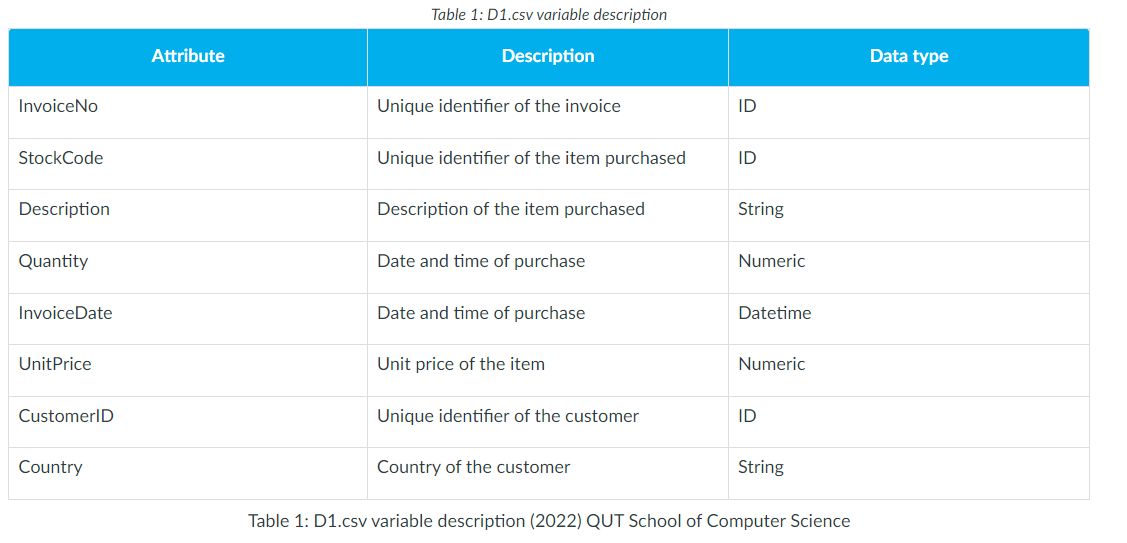

Consider each invoice as a transaction in the dataset ‘D1.csv’ and build an association mining model on this dataset to identify what are the common items that customers have purchased. The task is to conduct Association mining on this data set.

Answer the following questions concerning this data and analysis.

1. What pre-processing was required on the dataset before building the association mining model? What variables did you include in the analysis? Justify your choice.

Conduct association mining and answer the following:
    
    2. What ‘min_support’ and 'min_confidence' thresholds were set for this mining exercise? What is the rationale for why these values were chosen?
    3. Report the top-5 rules and interpret them.

4. Identify top-5 common items that customers have purchased along with ‘LUNCH BAG RED RETROSPOT’.
5. Can you perform sequence analysis on this dataset? If yes, present your results. If not, rationalise why.
6. How can the outcome of this study be used by the relevant decision-makers?

## What pre-processing was required on the dataset before building the association mining model? What variables did you include in the analysis? Justify your choice

In [2]:
# Import all required packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
import numpy as np

# To ignore future warnings
import warnings
warnings.filterwarnings('ignore')

In [64]:
import pandas as pd

# load the bank transaction dataset
df = pd.read_csv('D1.csv')

# Data info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19663 entries, 0 to 19662
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    19663 non-null  int64  
 1   StockCode    19663 non-null  object 
 2   Description  19075 non-null  object 
 3   Quantity     19663 non-null  int64  
 4   InvoiceDate  19663 non-null  object 
 5   UnitPrice    19663 non-null  float64
 6   CustomerID   15678 non-null  float64
 7   Country      19663 non-null  object 
dtypes: float64(2), int64(2), object(4)
memory usage: 1.2+ MB
None


In [65]:
# Convert the 'DateColumn' to a datetime data type
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Convert Customer ID to object
df['CustomerID'] = df['CustomerID'].astype(object)

# info
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19663 entries, 0 to 19662
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceNo    19663 non-null  int64         
 1   StockCode    19663 non-null  object        
 2   Description  19075 non-null  object        
 3   Quantity     19663 non-null  int64         
 4   InvoiceDate  19663 non-null  datetime64[ns]
 5   UnitPrice    19663 non-null  float64       
 6   CustomerID   15678 non-null  object        
 7   Country      19663 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.2+ MB
None


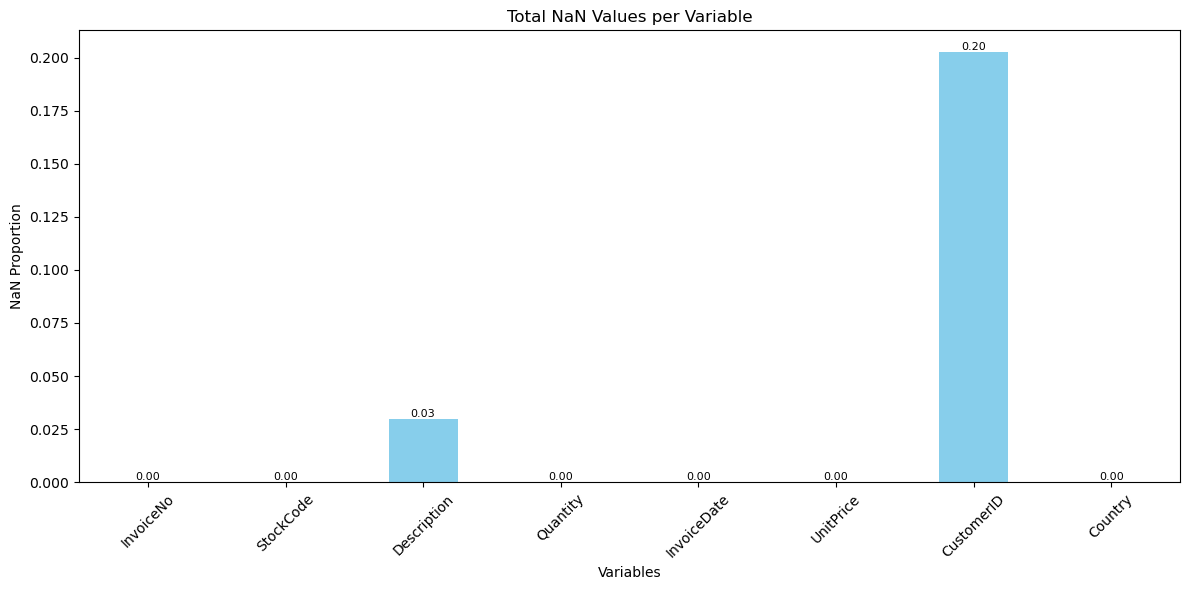

In [66]:
nan_counts = df.isna().sum()/19663

# Create a bar chart
plt.figure(figsize=(12, 6))
ax = nan_counts.plot(kind='bar', color='skyblue')
plt.title('Total NaN Values per Variable')
plt.xlabel('Variables')
plt.ylabel('NaN Proportion')
plt.xticks(rotation=45)

# Add data labels to the bars
for i, v in enumerate(nan_counts):
    ax.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

In [73]:
import pandas as pd

# Assuming df is your DataFrame
df['Description'].fillna("MISSING", inplace=True)

# Group by StockCode and collect unique descriptions along with their counts
stock_code_counts = df.groupby('StockCode')['Description'].agg(['unique', 'count'])

# Sort the DataFrame by the 'count' column in descending order
stock_code_counts = stock_code_counts.sort_values(by='count', ascending=False)

# Set the display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display the full output with unique descriptions and their counts, sorted by count
print(stock_code_counts)


                                                    unique  count
StockCode                                                        
85123A                [WHITE HANGING HEART T-LIGHT HOLDER]   2260
85099B                           [JUMBO BAG RED RETROSPOT]   2115
22423                           [REGENCY CAKESTAND 3 TIER]   2019
47566                                      [PARTY BUNTING]   1707
20725                            [LUNCH BAG RED RETROSPOT]   1594
84879                      [ASSORTED COLOUR BIRD ORNAMENT]   1489
22720         [SET OF 3 CAKE TINS PANTRY DESIGN , MISSING]   1401
21212                    [PACK OF 72 RETROSPOT CAKE CASES]   1370
20727                            [LUNCH BAG  BLACK SKULL.]   1328
22457                    [NATURAL SLATE HEART CHALKBOARD ]   1263
22386                            [JUMBO BAG PINK POLKADOT]   1238
22469                     [HEART OF WICKER SMALL, MISSING]   1227
85123a                [WHITE HANGING HEART T-LIGHT HOLDER]     67
35965     

Vast majority of StockCodes are missing a Description, hence it makes sense to drop Description from the data frame

### Pre-processing required on the dataset before building the association mining model
1. **Inconsistent Data.**. The 'StockCode' variable currently has '85123A' and '85123a'. '85123a' needs to be replaced with '85123A' for consistency
2. **Missing Data**. 'Description' is missing 3% of it's data, and 'CustomerID' is missing 20%. 'StockCode' will be used instead of 'Description' and 'CustomerID' is redunant so will be removed.

In [100]:
# Original Data
df = pd.read_csv('D1.csv')

In [101]:
# Inconsistent Data
df['StockCode'] = df['StockCode'].replace('85123a', '85123A')


In [102]:
# Redundant Data
df = df.drop(['Description'], axis=1)
df = df.drop(['CustomerID'], axis=1)

In [103]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19663 entries, 0 to 19662
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   InvoiceNo    19663 non-null  int64  
 1   StockCode    19663 non-null  object 
 2   Quantity     19663 non-null  int64  
 3   InvoiceDate  19663 non-null  object 
 4   UnitPrice    19663 non-null  float64
 5   Country      19663 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 921.8+ KB
None


The only variables that will be used for association mining will be 'Invoice Number' and 'StockCode'. 
This is becasue "StockCode" is unique for each purchased product and "InvoiceNo" is unique for each purchase. Using this two variables, we can find associated products

## Conduct association mining and answer the following:

In [93]:
# group by CustomerID, then list all StockCodes
transactions = df.groupby(['InvoiceNo'])['StockCode'].apply(list)

print(transactions)

InvoiceNo
536365                                             [85123A]
536367                                              [84879]
536373                                             [85123A]
536375                                             [85123A]
536378                                [22386, 20725, 21212]
536384                                       [22457, 22469]
536386                                             [85099B]
536388                                              [22469]
536390                                     [85123A, 85099B]
536392                                              [84879]
536394                                             [85123A]
536395                                       [84879, 21212]
536396                                             [85123A]
536401                                      [85123A, 20725]
536404                                [22469, 21212, 20727]
536406                                             [85123A]
536408                        

## What ‘min_support’ and `min_confidence’ thresholds were set for this mining exercise? What is the rationale for why these values were chosen?

In [97]:
from apyori import apriori

# type cast the transactions from pandas into normal list format and run apriori
transaction_list = list(transactions)
results = list(apriori(transaction_list, min_support=0.02, confidence=0.5))

# print first 5 rules
print(results[:5])

[RelationRecord(items=frozenset({'20725'}), support=0.15399763686490744, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20725'}), confidence=0.15399763686490744, lift=1.0)]), RelationRecord(items=frozenset({'20727'}), support=0.12534462386766443, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'20727'}), confidence=0.12534462386766443, lift=1.0)]), RelationRecord(items=frozenset({'21212'}), support=0.12997243009058684, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'21212'}), confidence=0.12997243009058684, lift=1.0)]), RelationRecord(items=frozenset({'22386'}), support=0.11992910594722332, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'22386'}), confidence=0.11992910594722332, lift=1.0)]), RelationRecord(items=frozenset({'22423'}), support=0.19584482079558882, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'2242

In [98]:
def convert_apriori_results_to_pandas_df(results):
    rules = []
    
    for rule_set in results:
        for rule in rule_set.ordered_statistics:
            # items_base = left side of rules, items_add = right side
            # support, confidence and lift for respective rules
            rules.append([','.join(rule.items_base), ','.join(rule.items_add),
                         rule_set.support, rule.confidence, rule.lift]) 
    
    # typecast it to pandas df
    return pd.DataFrame(rules, columns=['Left_side', 'Right_side', 'Support', 'Confidence', 'Lift']) 

result_df = convert_apriori_results_to_pandas_df(results)

print(result_df.head(20))

   Left_side   Right_side   Support  Confidence      Lift
0                   20725  0.153998    0.153998  1.000000
1                   20727  0.125345    0.125345  1.000000
2                   21212  0.129972    0.129972  1.000000
3                   22386  0.119929    0.119929  1.000000
4                   22423  0.195845    0.195845  1.000000
5                   22457  0.122981    0.122981  1.000000
6                   22469  0.118354    0.118354  1.000000
7                   22720  0.136570    0.136570  1.000000
8                   47566  0.166010    0.166010  1.000000
9                   84879  0.143265    0.143265  1.000000
10                 85099B  0.205987    0.205987  1.000000
11                 85123A  0.222529    0.222529  1.000000
12            20725,20727  0.063115    0.063115  1.000000
13     20725        20727  0.063115    0.409847  3.269758
14     20727        20725  0.063115    0.503535  3.269758
15            20725,21212  0.034069    0.034069  1.000000
16     20725  

In [105]:
# sort all acquired rules descending by lift
result_df = result_df.sort_values(by='Lift', ascending=False)
print(result_df.head(5))

        Left_side    Right_side   Support  Confidence      Lift
153  85099B,20727         20725  0.023139    0.625000  4.058504
148         20725  20727,85099B  0.023139    0.150256  4.058504
158   20725,22386        85099B  0.024518    0.770898  3.742466
157        85099B   20725,22386  0.024518    0.119025  3.742466
159  20725,85099B         22386  0.024518    0.430052  3.585884


## Report the top-5 rules and interpret them.

**Rule 1: Jumbo Bag Red Retrospot, Lunch Bag Black Skull => Lunch Bag Red Retrospot**
- There is a 2.3% chance that the items Jumbo Bag Red Retrospot, Lunch Bag Black Skull and Lunch Bag Red Retrospot are bought togethor. 
- There is a 62.5% chance that if the items Jumbo Bag Red Retrospot and Lunch Bag Black Skull are bought togethor, the Lunch Bag Red Retrospot will be bought.
- A customer purchasing a Jumbo Bag Red Retrospot and a Lunch Bag Black Skull is 4.1 times as likely to also purchase a Lunch Bag Red Retrospot than a customer chosen at random.


**Rule 2: Lunch Bag Red Retrospot => Jumbo Bag Red Retrospot, Lunch Bag Black Skull**
- There is a 2.3% chance that the items Lunch Bag Red Retropot, Jumbo Bag Red Retrospot and Lunch Bag Black Skull are bought togethor. 
- There is a 15.0% chance that if the item Lunch Bag Red Retrospot is bought, the items Jumbo Bag Red Retrospot and Lunch Bag Black Skull will also be bought.
- A customer purchasing a Lunch Bag Red Retrospot is 4.1 times as likely to also purchase a Jumbo Bag Red Retrospot and a Lunch Bag Black Skull than a customer chosen at random.


**Rule 3: Lunch Bag Red Retrospot, Jumbo Bag Pink Polkadot => Jumbo Bag Red Retrospot**
- There is a 2.5% chance that the items Lunch Bag Red Retrospot, Jumbo Bag Pink Polkadot and Jumbo Bag Red Retrospot are bought togethor. 
- There is a 77.1% chance that if the items Lunch Bag Red Retrospot and Jumbo Bag Pink Polkadot are bought, the item Jumbo Bag Red Retrospot will also be bought.
- A customer purchasing a Lunch Bag Red Retrospot and a Jumbo Bag Pink Polkadot is 3.7 times as likely to also purchase a Jumbo Bag Red Retrospot than a customer chosen at random.


**Rule 4: Jumbo Bag Red Retrospot => Lunch Bag Red Retrospot, Jumbo Bag Pink Polkadot**
- There is a 2.5% chance that the items Jumbo Bag Red Retrospot, Lunch Bag Red Retrospot and Jumbo Bag Pink Polkadot are bought togethor. 
- There is a 11.9% chance that if the item Jumbo Bag Red Retrospot is bought, the items Lunch Bag Red Retrospot and Jumbo Bag Pink Polkadot will also be bought.
- A customer purchasing a Jumbo Bag Red Retrospot is 3.7 times as likely to also purchase a Lunch Bag Red Retrospot and a Jumbo Bag Pink Polkadot than a customer chosen at random.

**Rule 5: Lunch Bag Red Retrospot, Jumbo Bag Red Retrospot => Jumbo Bag Pink Polkadot**
- There is a 2.5% chance that the items Lunch Bag Red Retrospot, Jumbo Bag Red Retrospot and Jumbo Bag Pink Polkadot are bought togethor. 
- There is a 11.9% chance that if the items Lunch Bag Red Retrospot and Jumbo Bag Red Retrospot are bought, the item Jumbo Bag Pink Polkadot will also be bought.
- A customer purchasing a Lunch Bag Red Retrospot and a Jumbo Bag Red Retrospot is 3.6 times as likely to also purchase a Jumbo Bag Pink Polkadot than a customer chosen at random.

## Identify top-5 common items that customers have purchased along with ‘LUNCH BAG RED RETROSPOT’.

In [106]:
value = '20725'
filtered_df = result_df[result_df['Left_side'] == value]
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 148 to 22
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Left_side   11 non-null     object 
 1   Right_side  11 non-null     object 
 2   Support     11 non-null     float64
 3   Confidence  11 non-null     float64
 4   Lift        11 non-null     float64
dtypes: float64(3), object(2)
memory usage: 528.0+ bytes
None


In [108]:
filtered_df = filtered_df.sort_values(by='Lift', ascending=False)
print(filtered_df.head(5))

    Left_side    Right_side   Support  Confidence      Lift
148     20725  20727,85099B  0.023139    0.150256  4.058504
13      20725         20727  0.063115    0.409847  3.269758
155     20725  22386,85099B  0.024518    0.159207  1.959888
34      20725        85099B  0.057011    0.370205  1.797227
19      20725         22386  0.031804    0.206522  1.722032


### Top 5 Associations
1. LUNCH BAG RED RETROSPOT => Jumbo Bag Red Retrospot, Lunch Bag Black Skull
2. LUNCH BAG RED RETROSPOT => Jumbo Bag Red Retrospot
3. LUNCH BAG RED RETROSPOT => Jumbo Bag Pink Polkadot, Lunch Bag Black Skull
4. LUNCH BAG RED RETROSPOT => Lunch Bag Black Skull
5. LUNCH BAG RED RETROSPOT => Jumbo Bag Pink Polkadot

**Sequential Mining**

## Can you perform sequence analysis on this dataset? If yes, present your results. If not, rationalise why.

In [116]:
transactions = df.groupby(['InvoiceNo'])['StockCode'].apply(list)
sequences = transactions.values.tolist()

# show the first 5 sequences
print(sequences)

[['85123A'], ['84879'], ['85123A'], ['85123A'], ['22386', '20725', '21212'], ['22457', '22469'], ['85099B'], ['22469'], ['85123A', '85099B'], ['84879'], ['85123A'], ['84879', '21212'], ['85123A'], ['85123A', '20725'], ['22469', '21212', '20727'], ['85123A'], ['84879', '21212'], ['85099B'], ['20727', '20725'], ['22139'], ['22469', '21212'], ['84879'], ['22386', '85099B', '84879', '21212', '21212'], ['22423'], ['84879', '85123A', '22423'], ['85123A', '22469', '22469'], ['85099B'], ['22423'], ['85099B'], ['22423'], ['22423'], ['21212'], ['84879'], ['22423'], ['22457', '22469'], ['22423'], ['20727', '22386', '85099B', '85123A'], ['22423', '22457', '22469', '85099B', '85123A', '20725', '21212'], ['21134'], ['22145'], ['37509'], ['85226A'], ['85044'], ['20950'], ['37461'], ['84670'], ['22423'], ['22457'], ['22469'], ['85099B', '85123A'], ['20727', '85099B', '85123A'], ['20725'], ['20727'], ['85099B'], ['85123A', '22457'], ['22386'], ['20725', '20727', '21212', '22386', '22423', '22469', '848

In [112]:
# Open the file in write mode ('w')
with open('seq_rule_output2.txt', 'w') as f:
    # Nothing needs to be written for it to be empty
    pass

In [117]:
from collections import defaultdict
import subprocess
import re

''' Uses SPMF to find association rules in supplied transactions '''
def get_association_rules(sequences, min_sup, min_conf):
    # step 1: create required input for SPMF
    
    # prepare a dict to uniquely assign each item in the transactions to an int ID
    item_dict = defaultdict(int)
    output_dict = defaultdict(str)
    item_id = 1
    
    # write your sequences in SPMF format
    with open('seq_rule_input.txt', 'w+') as f:
        for sequence in sequences:
            z = []
            for itemset in sequence:
                # if there are multiple items in one itemset
                if isinstance(itemset, list):
                    for item in itemset:
                        if item not in item_dict:
                            item_dict[item] = item_id
                            item_id += 1

                        z.append(item_dict[item])
                else:
                    if itemset not in item_dict:
                        item_dict[itemset] = item_id
                        output_dict[str(item_id)] = itemset
                        item_id += 1
                    z.append(item_dict[itemset])
                    
                # end of itemset
                z.append(-1)
            
            # end of a sequence
            z.append(-2)
            f.write(' '.join([str(x) for x in z]))
            f.write('\n')
    
    # run SPMF with supplied parameters
    supp_param = '{}%'.format(int(min_sup * 100))
    conf_param = '{}%'.format(int(min_conf * 100))
    subprocess.call(['java', '-jar', 'spmf (1).jar', 'run', 'RuleGrowth', 'seq_rule_input.txt', 'seq_rule_output.txt', supp_param, conf_param], shell=True)
    
    # read back the output rules
    outputs = open('seq_rule_output.txt', 'r').read().strip().split('\n')
    output_rules = []
    for rule in outputs:
        left, right, sup, conf = re.search(pattern=r'([0-9\,]+) ==> ([0-9\,]+) #SUP: ([0-9]+) #CONF: ([0-9\.]+)', string=rule).groups()
        sup = int(sup) / len(sequences)
        conf = float(conf)
        output_rules.append([[output_dict[x] for x in left.split(',')], [output_dict[x] for x in right.split(',')], sup, conf])
    
    # return pandas DataFrame
    return pd.DataFrame(output_rules, columns = ['Left_rule', 'Right_rule', 'Support', 'Confidence'])

In [121]:
get_association_rules(sequences, 0.1, 0.1)

Left_rule       Right_rule   Support  Confidence
0          [85123A]          [84879]  0.426250    0.631510
1          [85123A]   [84879, 22386]  0.195549    0.289716
2          [85123A]  [84879, 85099B]  0.112150    0.166156
3          [85123A]   [84879, 22139]  0.087731    0.129978
4          [85123A]          [22386]  0.284758    0.421882
5   [85123A, 84879]          [22386]  0.195549    0.458766
6          [85123A]          [20725]  0.122588    0.181619
7          [85123A]          [22469]  0.088913    0.131729
8          [85123A]         [85099B]  0.165124    0.244639
9   [85123A, 84879]         [85099B]  0.112150    0.263109
10         [85123A]          [20727]  0.116877    0.173158
11         [85123A]          [22139]  0.129579    0.191977
12  [85123A, 84879]          [22139]  0.087731    0.205821
13          [84879]          [22386]  0.202147    0.415251
14          [84879]         [85099B]  0.123671    0.254045
15          [84879]          [20727]  0.080445    0.165251
16          [84879]          [22139]  0.087731    0.180218

# Project B — Descriptive mining scenario and dataset

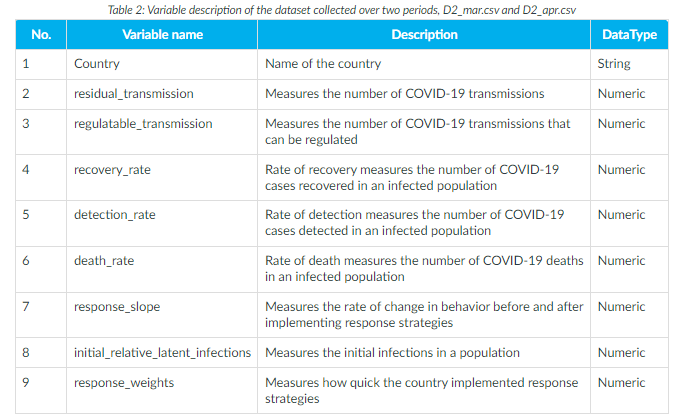

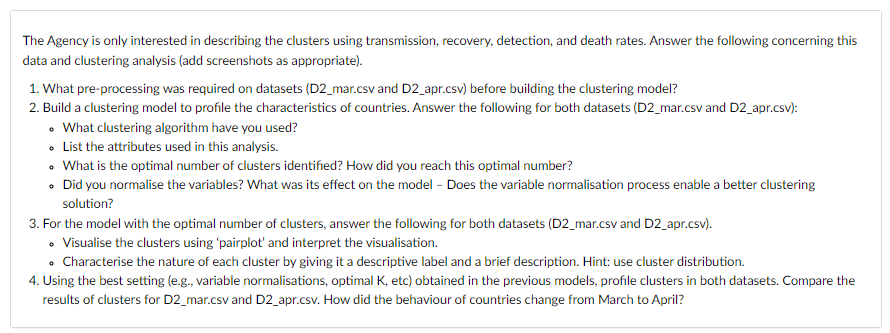

In [111]:
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

In [112]:
import pandas as pd

# load the bank transaction dataset
D2_mar = pd.read_csv('D2_mar.csv')

# info and the first 10 transactions
print(D2_mar.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   residual_transmission               102 non-null    float64
 1   regulatable_transmission            102 non-null    float64
 2   recovery_rate                       102 non-null    float64
 3   detection_rate                      102 non-null    float64
 4   death_rate                          102 non-null    float64
 5   response_slope                      102 non-null    float64
 6   initial_relative_latent_infections  102 non-null    float64
 7   response_weights                    102 non-null    float64
 8   Country                             102 non-null    object 
dtypes: float64(8), object(1)
memory usage: 7.3+ KB
None


In [113]:
unique_countries = D2_mar['Country'].unique()
sorted_countries = sorted(unique_countries)
print(sorted_countries)

['AFG', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BFA', 'BGR', 'BHR', 'BIH', 'BRA', 'BRN', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COL', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GHA', 'GRC', 'HND', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ', 'KHM', 'KOR', 'KWT', 'LBN', 'LKA', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MEX', 'MKD', 'MLT', 'MUS', 'MYS', 'NGA', 'NLD', 'NOR', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PSE', 'QAT', 'ROU', 'RUS', 'SAU', 'SEN', 'SGP', 'SRB', 'SVK', 'SVN', 'SWE', 'THA', 'TUN', 'TUR', 'TWN', 'UKR', 'URY', 'USA', 'UZB', 'VEN', 'VNM', 'ZAF']


In [114]:
#Create a new DataFrame with numeric variables
numeric_df = D2_mar.select_dtypes(include=['int', 'float'])


summary_df = pd.DataFrame(columns=['Variable', 'Mean', 'Median', 'Mode', 'Skew'])

# Loop through the columns in the original DataFrame
for column in numeric_df.columns:
    # Calculate the mean, median, mode, and skewness for each variable
    mean_value = numeric_df[column].mean()
    median_value = numeric_df[column].median()
    mode_value = numeric_df[column].mode().iloc[0]

    
    # Determine the skewness category
    skew_category = ''
    if mode_value <= median_value <= mean_value:
        skew_category = 'Positive Skew'
    elif mean_value <= median_value <= mode_value:
        skew_category = 'Negative Skew'
    
    # Append the variable name, mean, median, mode, and skewness to the summary DataFrame
    summary_df = summary_df.append({'Variable': column, 'Mean': mean_value, 'Median': median_value, 'Mode': mode_value, 
                                    'Skew': skew_category}, ignore_index=True)

# Display the summary DataFrame
print(summary_df)

                             Variable      Mean    Median      Mode  \
0               residual_transmission  0.197575  0.154607  0.000000   
1            regulatable_transmission  0.189662  0.147812  0.000000   
2                       recovery_rate  0.153142  0.090012  0.043635   
3                      detection_rate  0.255073  0.234313  0.000000   
4                          death_rate  0.169050  0.136567  0.000000   
5                      response_slope  0.327380  0.327628  0.000000   
6  initial_relative_latent_infections  0.249317  0.219543  0.000000   
7                    response_weights  0.060356  0.043006  0.000000   

            Skew  
0  Positive Skew  
1  Positive Skew  
2  Positive Skew  
3  Positive Skew  
4  Positive Skew  
5                 
6  Positive Skew  
7  Positive Skew  


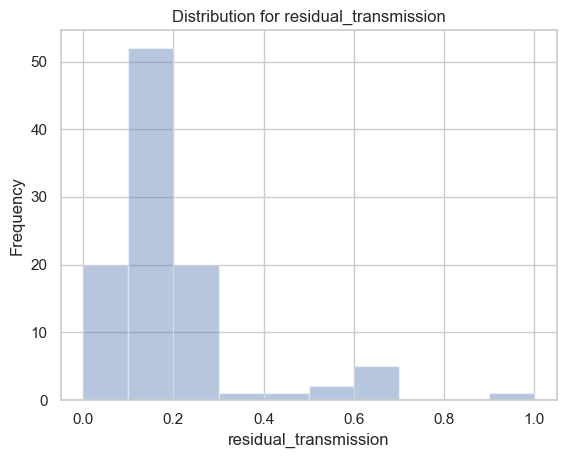

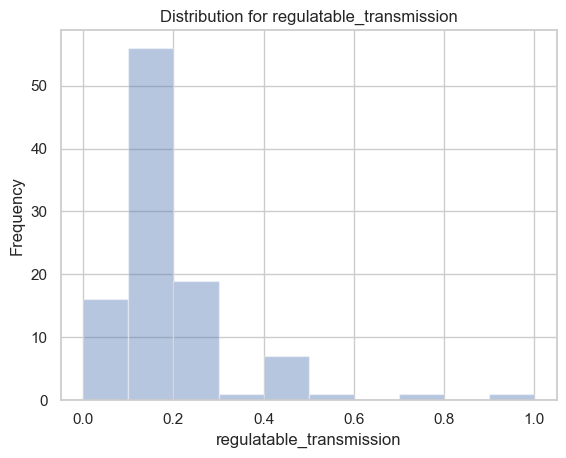

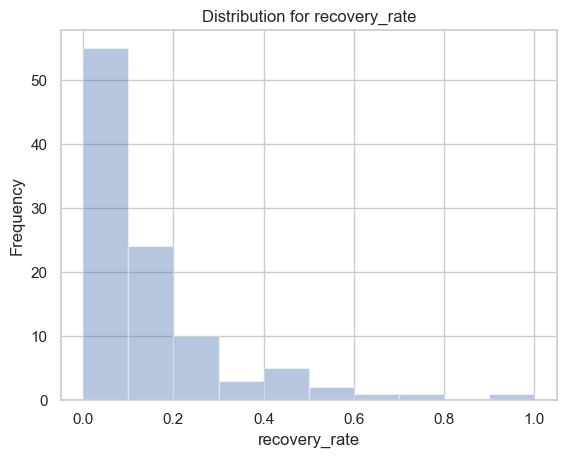

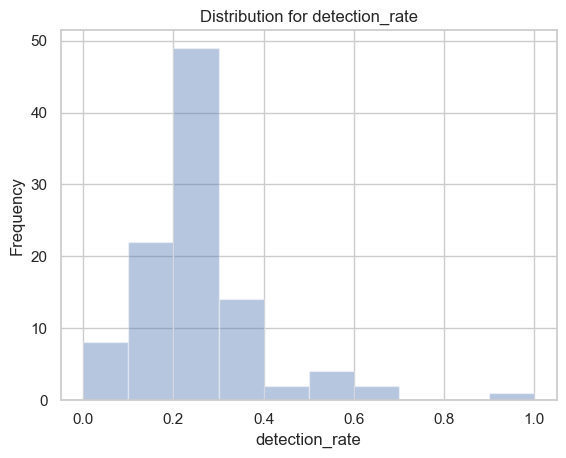

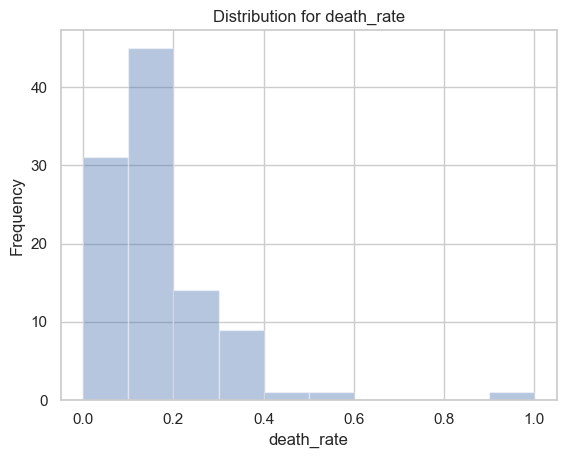

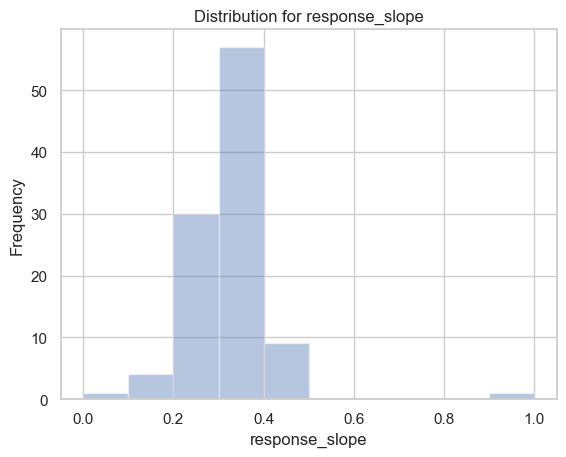

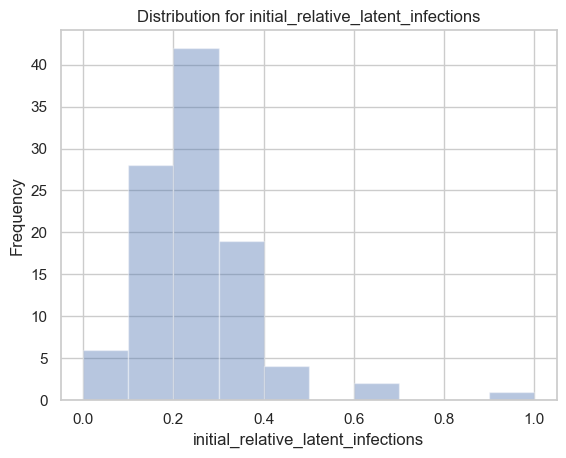

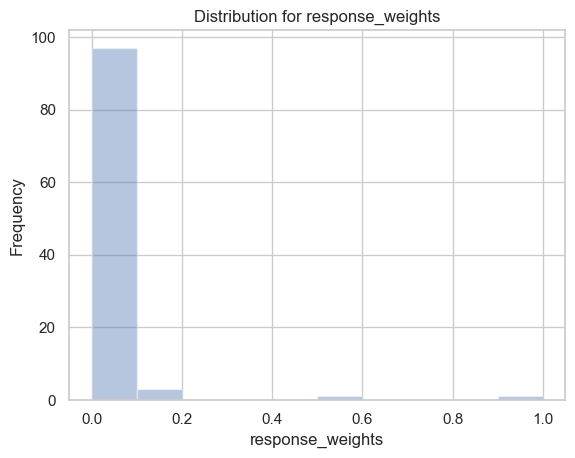

In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Iteratively generate histograms for each variable using sns.distplot
for column in numeric_df.columns:
    sns.distplot(numeric_df[column], bins=10, kde=False, rug=False)
    plt.title(f'Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

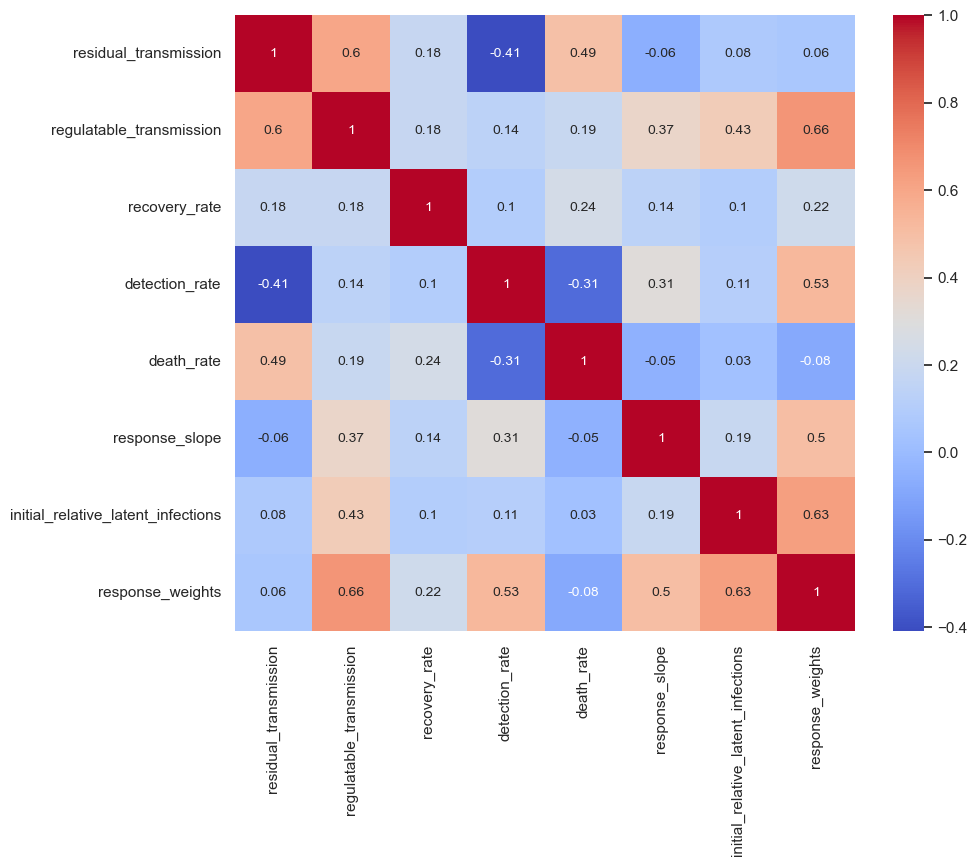

In [116]:
correlation_matrix = D2_mar.corr()
rounded_correlation_matrix = correlation_matrix.round(2)
plt.figure(figsize=(10, 8))
annot_kws = {"size": 10}  # Adjust the size as needed
sns.heatmap(rounded_correlation_matrix, annot=True, cmap='coolwarm', annot_kws=annot_kws)
plt.show()

- Data is consistent
- There is no missing data
- No redundant data
- Several variables are skewed. For cluster analysis, variables are normalized anyway, so no need to transform
- No colinearity present between variables

In [117]:
import pandas as pd

# load the bank transaction dataset
D2_apr = pd.read_csv('D2_apr.csv')

# info and the first 10 transactions
print(D2_apr.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   residual_transmission               118 non-null    float64
 1   regulatable_transmission            118 non-null    float64
 2   recovery_rate                       118 non-null    float64
 3   detection_rate                      118 non-null    float64
 4   death_rate                          118 non-null    float64
 5   response_slope                      118 non-null    float64
 6   initial_relative_latent_infections  118 non-null    float64
 7   response_weights                    118 non-null    float64
 8   Country                             118 non-null    object 
dtypes: float64(8), object(1)
memory usage: 8.4+ KB
None


In [118]:
unique_countries = D2_apr['Country'].unique()
sorted_countries = sorted(unique_countries)
print(sorted_countries)

['AFG', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BOL', 'BRA', 'BRN', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COL', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LBN', 'LKA', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MLT', 'MNE', 'MUS', 'MYS', 'NER', 'NGA', 'NLD', 'NOR', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SEN', 'SGP', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'THA', 'TTO', 'TUN', 'TUR', 'TWN', 'UKR', 'URY', 'USA', 'UZB', 'VEN', 'VNM', 'ZAF']


In [119]:
#Create a new DataFrame with numeric variables
numeric_df = D2_apr.select_dtypes(include=['int', 'float'])


summary_df = pd.DataFrame(columns=['Variable', 'Mean', 'Median', 'Mode', 'Skew'])

# Loop through the columns in the original DataFrame
for column in numeric_df.columns:
    # Calculate the mean, median, mode, and skewness for each variable
    mean_value = numeric_df[column].mean()
    median_value = numeric_df[column].median()
    mode_value = numeric_df[column].mode().iloc[0]

    
    # Determine the skewness category
    skew_category = ''
    if mode_value <= median_value <= mean_value:
        skew_category = 'Positive Skew'
    elif mean_value <= median_value <= mode_value:
        skew_category = 'Negative Skew'
    
    # Append the variable name, mean, median, mode, and skewness to the summary DataFrame
    summary_df = summary_df.append({'Variable': column, 'Mean': mean_value, 'Median': median_value, 'Mode': mode_value, 
                                    'Skew': skew_category}, ignore_index=True)

# Display the summary DataFrame
print(summary_df)

                             Variable      Mean    Median      Mode  \
0               residual_transmission  0.264999  0.258072  0.000000   
1            regulatable_transmission  0.212013  0.192661  0.000000   
2                       recovery_rate  0.233539  0.148754  0.025050   
3                      detection_rate  0.372084  0.343710  0.000000   
4                          death_rate  0.215837  0.171844  0.031121   
5                      response_slope  0.548253  0.572325  0.000000   
6  initial_relative_latent_infections  0.308286  0.268422  0.000000   
7                    response_weights  0.162710  0.122920  0.000000   

            Skew  
0  Positive Skew  
1  Positive Skew  
2  Positive Skew  
3  Positive Skew  
4  Positive Skew  
5                 
6  Positive Skew  
7  Positive Skew  


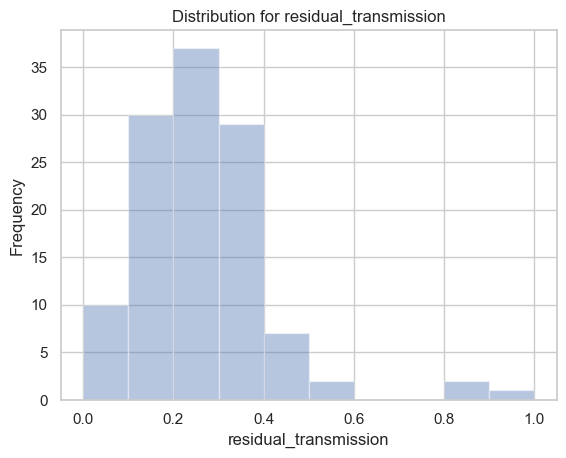

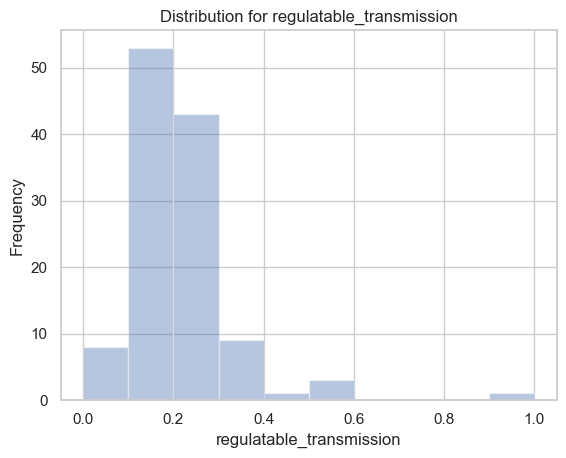

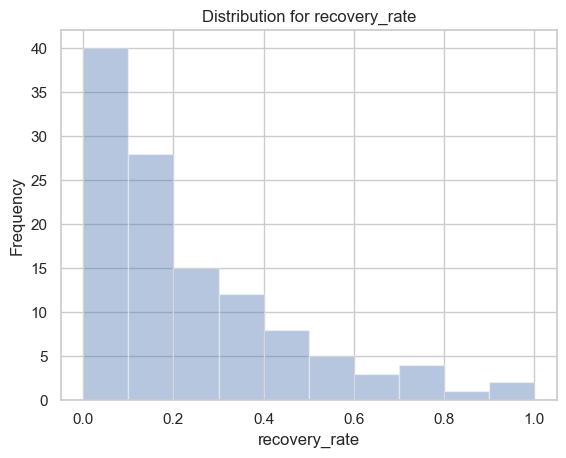

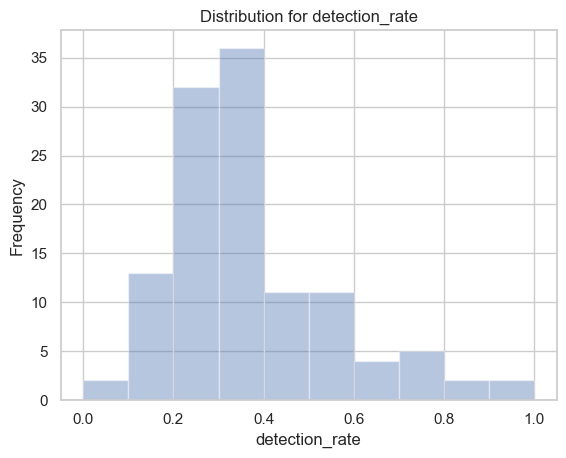

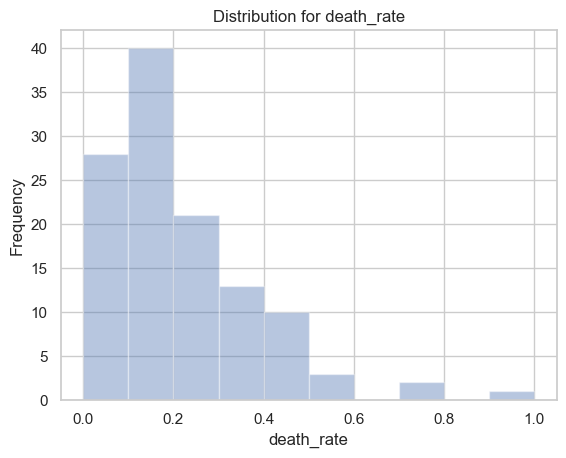

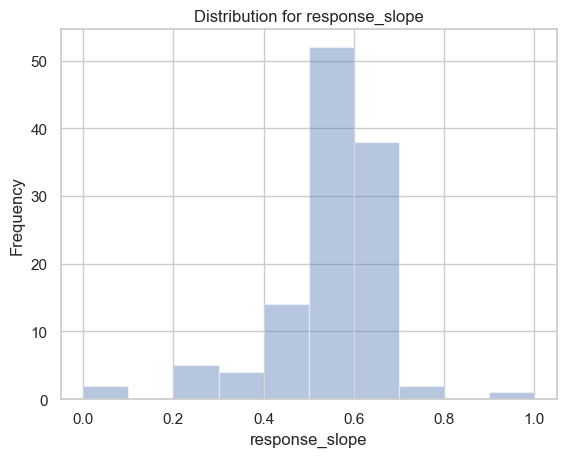

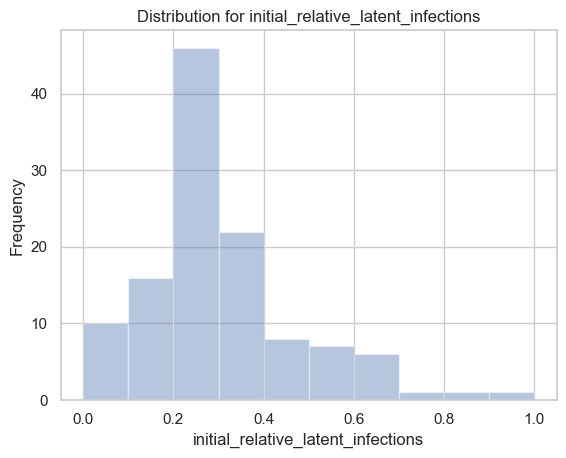

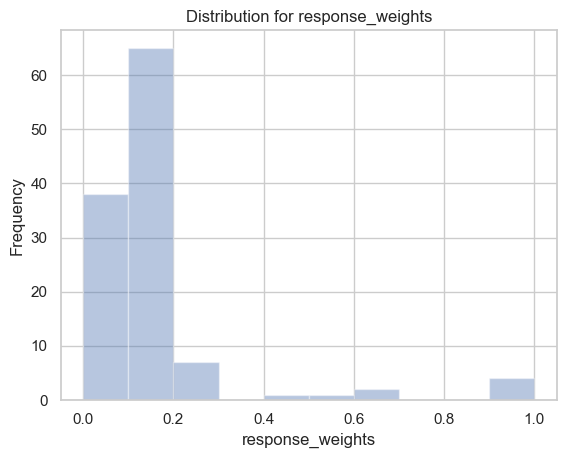

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

# Iteratively generate histograms for each variable using sns.distplot
for column in numeric_df.columns:
    sns.distplot(numeric_df[column], bins=10, kde=False, rug=False)
    plt.title(f'Distribution for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

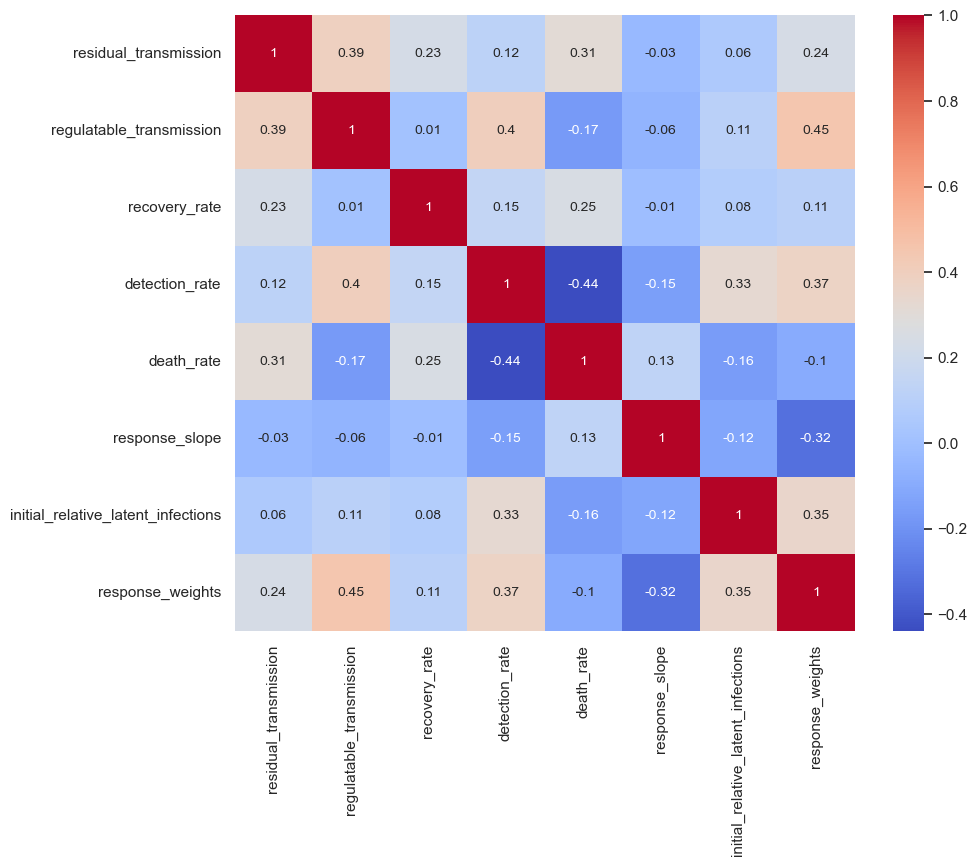

In [121]:
correlation_matrix = D2_apr.corr()
rounded_correlation_matrix = correlation_matrix.round(2)
plt.figure(figsize=(10, 8))
annot_kws = {"size": 10}  # Adjust the size as needed
sns.heatmap(rounded_correlation_matrix, annot=True, cmap='coolwarm', annot_kws=annot_kws)
plt.show()

- Data is consistent
- There is no missing data
- No redundant data
- Several variables are skewed. For cluster analysis, variables are normalized anyway, so no need to transform
- No colinearity present between variables

In [122]:
Countries = pd.concat([D2_mar['Country'], D2_apr['Country']], axis=0, ignore_index=True)
Countries = pd.DataFrame({'Combined Countries': Countries})
Countries.info()


unique_countries = Countries['Combined Countries'].unique()
sorted_countries = sorted(unique_countries)
print(sorted_countries)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220 entries, 0 to 219
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Combined Countries  220 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB
['AFG', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BOL', 'BRA', 'BRN', 'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COL', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM', 'KOR', 'KWT', 'LBN', 'LKA', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MLT', 'MNE', 'MUS', 'MYS', 'NER', 'NGA', 'NLD', 'NOR', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SEN', 'SGP', 'SLV

In [123]:
# Use factorize to map each unique value to a number
mapping, labels = pd.factorize(sorted_countries,sort = True)

In [124]:
# Create a dictionary to map country names to numbers (adding 1 to each label value)
country_mapping = dict(zip(labels, [num + 1 for num in mapping]))

D2_mar['Country'] = D2_mar['Country'].replace(country_mapping)
D2_apr['Country'] = D2_apr['Country'].replace(country_mapping)

In [125]:
D2_apr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   residual_transmission               118 non-null    float64
 1   regulatable_transmission            118 non-null    float64
 2   recovery_rate                       118 non-null    float64
 3   detection_rate                      118 non-null    float64
 4   death_rate                          118 non-null    float64
 5   response_slope                      118 non-null    float64
 6   initial_relative_latent_infections  118 non-null    float64
 7   response_weights                    118 non-null    float64
 8   Country                             118 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 8.4 KB


In [126]:
from sklearn.preprocessing import StandardScaler

# convert df to matrix
X_mar = D2_mar.to_numpy()
X_apr = D2_apr.to_numpy()

# scaling
scaler = StandardScaler()
X_mar = scaler.fit_transform(X_mar)
X_apr = scaler.fit_transform(X_apr)

In [127]:
X_apr

array([[-0.89588219,  0.36452926, -0.41727058, ..., -0.37935997,
        -0.28886773, -1.57064485],
       [-0.99974306, -0.42595045, -1.0178316 , ..., -0.61467155,
        -0.44992347, -0.36697309],
       [ 0.3000159 , -0.34913253, -0.23432657, ..., -0.12099099,
        -0.2650894 , -0.33761525],
       ...,
       [-0.59720751,  0.18994244,  0.38775875, ..., -0.00181919,
        -0.54539186, -1.60000269],
       [-0.85643415,  0.35773605, -0.67591556, ...,  0.17990051,
        -0.36149723, -0.42568879],
       [ 0.42586095, -0.48164913, -0.45890612, ..., -1.3777575 ,
        -0.22245189, -0.39633094]])

In [128]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

**D2_mar**

In [129]:
# Set a specific seed for reproducibility
rs = 42

In [130]:
# list to save the clusters and cost
clusters = []
cost_vals = []

# this whole process should take a while
for k in range(2, 18, 2):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit_predict(X_mar, categorical=[1])
    
    # append model to cluster list
    clusters.append(model)
    cost_vals.append(model.cost_)

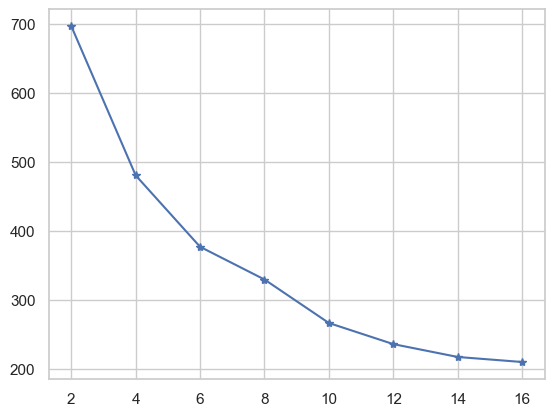

In [131]:
# plot the cost vs K values
plt.plot(range(2,18,2), cost_vals, marker='*')
plt.show()

**D2_apr**

In [132]:
# list to save the clusters and cost
clusters = []
cost_vals = []

# this whole process should take a while
for k in range(2, 18, 2):
    # train clustering with the specified K
    model = KPrototypes(n_clusters=k, random_state=rs, n_jobs=10)
    model.fit_predict(X_apr, categorical=[1])
    
    # append model to cluster list
    clusters.append(model)
    cost_vals.append(model.cost_)

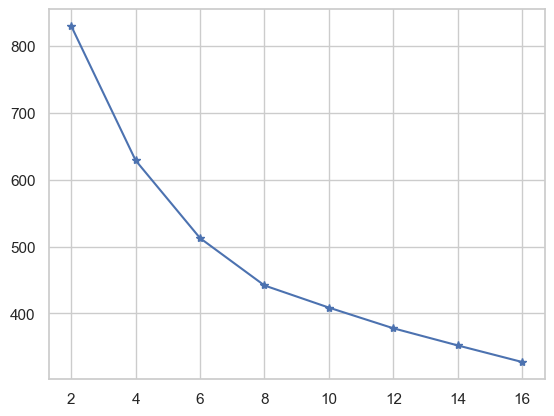

In [133]:
# plot the cost vs K values
plt.plot(range(2,18,2), cost_vals, marker='*')
plt.show()

By applying the elbow method on the above plot, the optimal value for $K$ lies between 4 and 6. The silhouette score has to be calculated to find the optimal value.

Due to the presences of mixed data types (numeric and categorical), the calculation of silhouette score for `Kprototypes` is different form `KMeans`. For `Kprototypes`, two silhouette scores representing numeric variables and categorical variables should be calculated seperately and average should be calculated. We will first see how to calculate this value for $K = 4$.

In [134]:
X_mar_num = [[row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7]] for row in X_mar] # Variables of X with numeric datatype
X_apr_num = [[row[0], row[1], row[2], row[3], row[4], row[5], row[6], row[7]] for row in X_apr] # Variables of X with numeric datatype

X_mar_cat = [[row[8]] for row in X_mar] # variables of X with categorical datatype
X_apr_cat = [[row[8]] for row in X_apr] # variables of X with categorical datatype

**D2_mar**

In [135]:
from sklearn.metrics import silhouette_score

model = clusters[0] # cluster[0] holds the K-prtotypes model with K=2
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_mar_num, model.fit_predict(X_mar,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_mar_cat, model.fit_predict(X_mar,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=2: " + str(silScore))

model = clusters[1] # cluster[1] holds the K-prtotypes model with K=4
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_mar_num, model.fit_predict(X_mar,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_mar_cat, model.fit_predict(X_mar,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=4: " + str(silScore))

model = clusters[2] # cluster[2] holds the K-prtotypes model with K=6
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_mar_num, model.fit_predict(X_mar,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_mar_cat, model.fit_predict(X_mar,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=6: " + str(silScore))

model = clusters[3] # cluster[3] holds the K-prtotypes model with K=8
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_mar_num, model.fit_predict(X_mar,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_mar_cat, model.fit_predict(X_mar,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=8: " + str(silScore))

model = clusters[4] # cluster[4] holds the K-prtotypes model with K=10
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_mar_num, model.fit_predict(X_mar,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_mar_cat, model.fit_predict(X_mar,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=10: " + str(silScore))

The avg silhouette score for k=2: 0.3679905419921004
The avg silhouette score for k=4: 0.14819416060330495
The avg silhouette score for k=6: 0.010972233916866457
The avg silhouette score for k=8: 0.01633542211102731
The avg silhouette score for k=10: 0.024585893364026053


**D2_apr**

In [136]:
from sklearn.metrics import silhouette_score

model = clusters[0] # cluster[0] holds the K-prtotypes model with K=2
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_apr_num, model.fit_predict(X_apr,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_apr_cat, model.fit_predict(X_apr,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=2: " + str(silScore))

model = clusters[1] # cluster[1] holds the K-prtotypes model with K=4
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_apr_num, model.fit_predict(X_apr,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_apr_cat, model.fit_predict(X_apr,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=4: " + str(silScore))

model = clusters[2] # cluster[2] holds the K-prtotypes model with K=6
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_apr_num, model.fit_predict(X_apr,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_apr_cat, model.fit_predict(X_apr,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=6: " + str(silScore))

model = clusters[3] # cluster[3] holds the K-prtotypes model with K=8
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_apr_num, model.fit_predict(X_apr,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_apr_cat, model.fit_predict(X_apr,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=8: " + str(silScore))

model = clusters[4] # cluster[4] holds the K-prtotypes model with K=10
# Calculate the Silhouette Score for the numeric and categorical variables seperately
silScoreNums = silhouette_score(X_apr_num, model.fit_predict(X_apr,categorical=[1]), metric='euclidean')
silScoreCats = silhouette_score(X_apr_cat, model.fit_predict(X_apr,categorical=[1]), metric='hamming') # note the metric here defined to `hamming`
# Average the silhouette scores
silScore = (silScoreNums + silScoreCats) / 2
print("The avg silhouette score for k=10: " + str(silScore))

The avg silhouette score for k=2: 0.2620817625459884
The avg silhouette score for k=4: 0.02214522389473484
The avg silhouette score for k=6: 0.021391480309120643
The avg silhouette score for k=8: 0.025228220601142277
The avg silhouette score for k=10: 0.02219987361134436


So for **D2_mar** k = 10 is the best option

Cluster membership
9    32
4    31
5    11
6     9
7     7
1     6
2     3
0     1
3     1
8     1
Name: Cluster_ID, dtype: int64


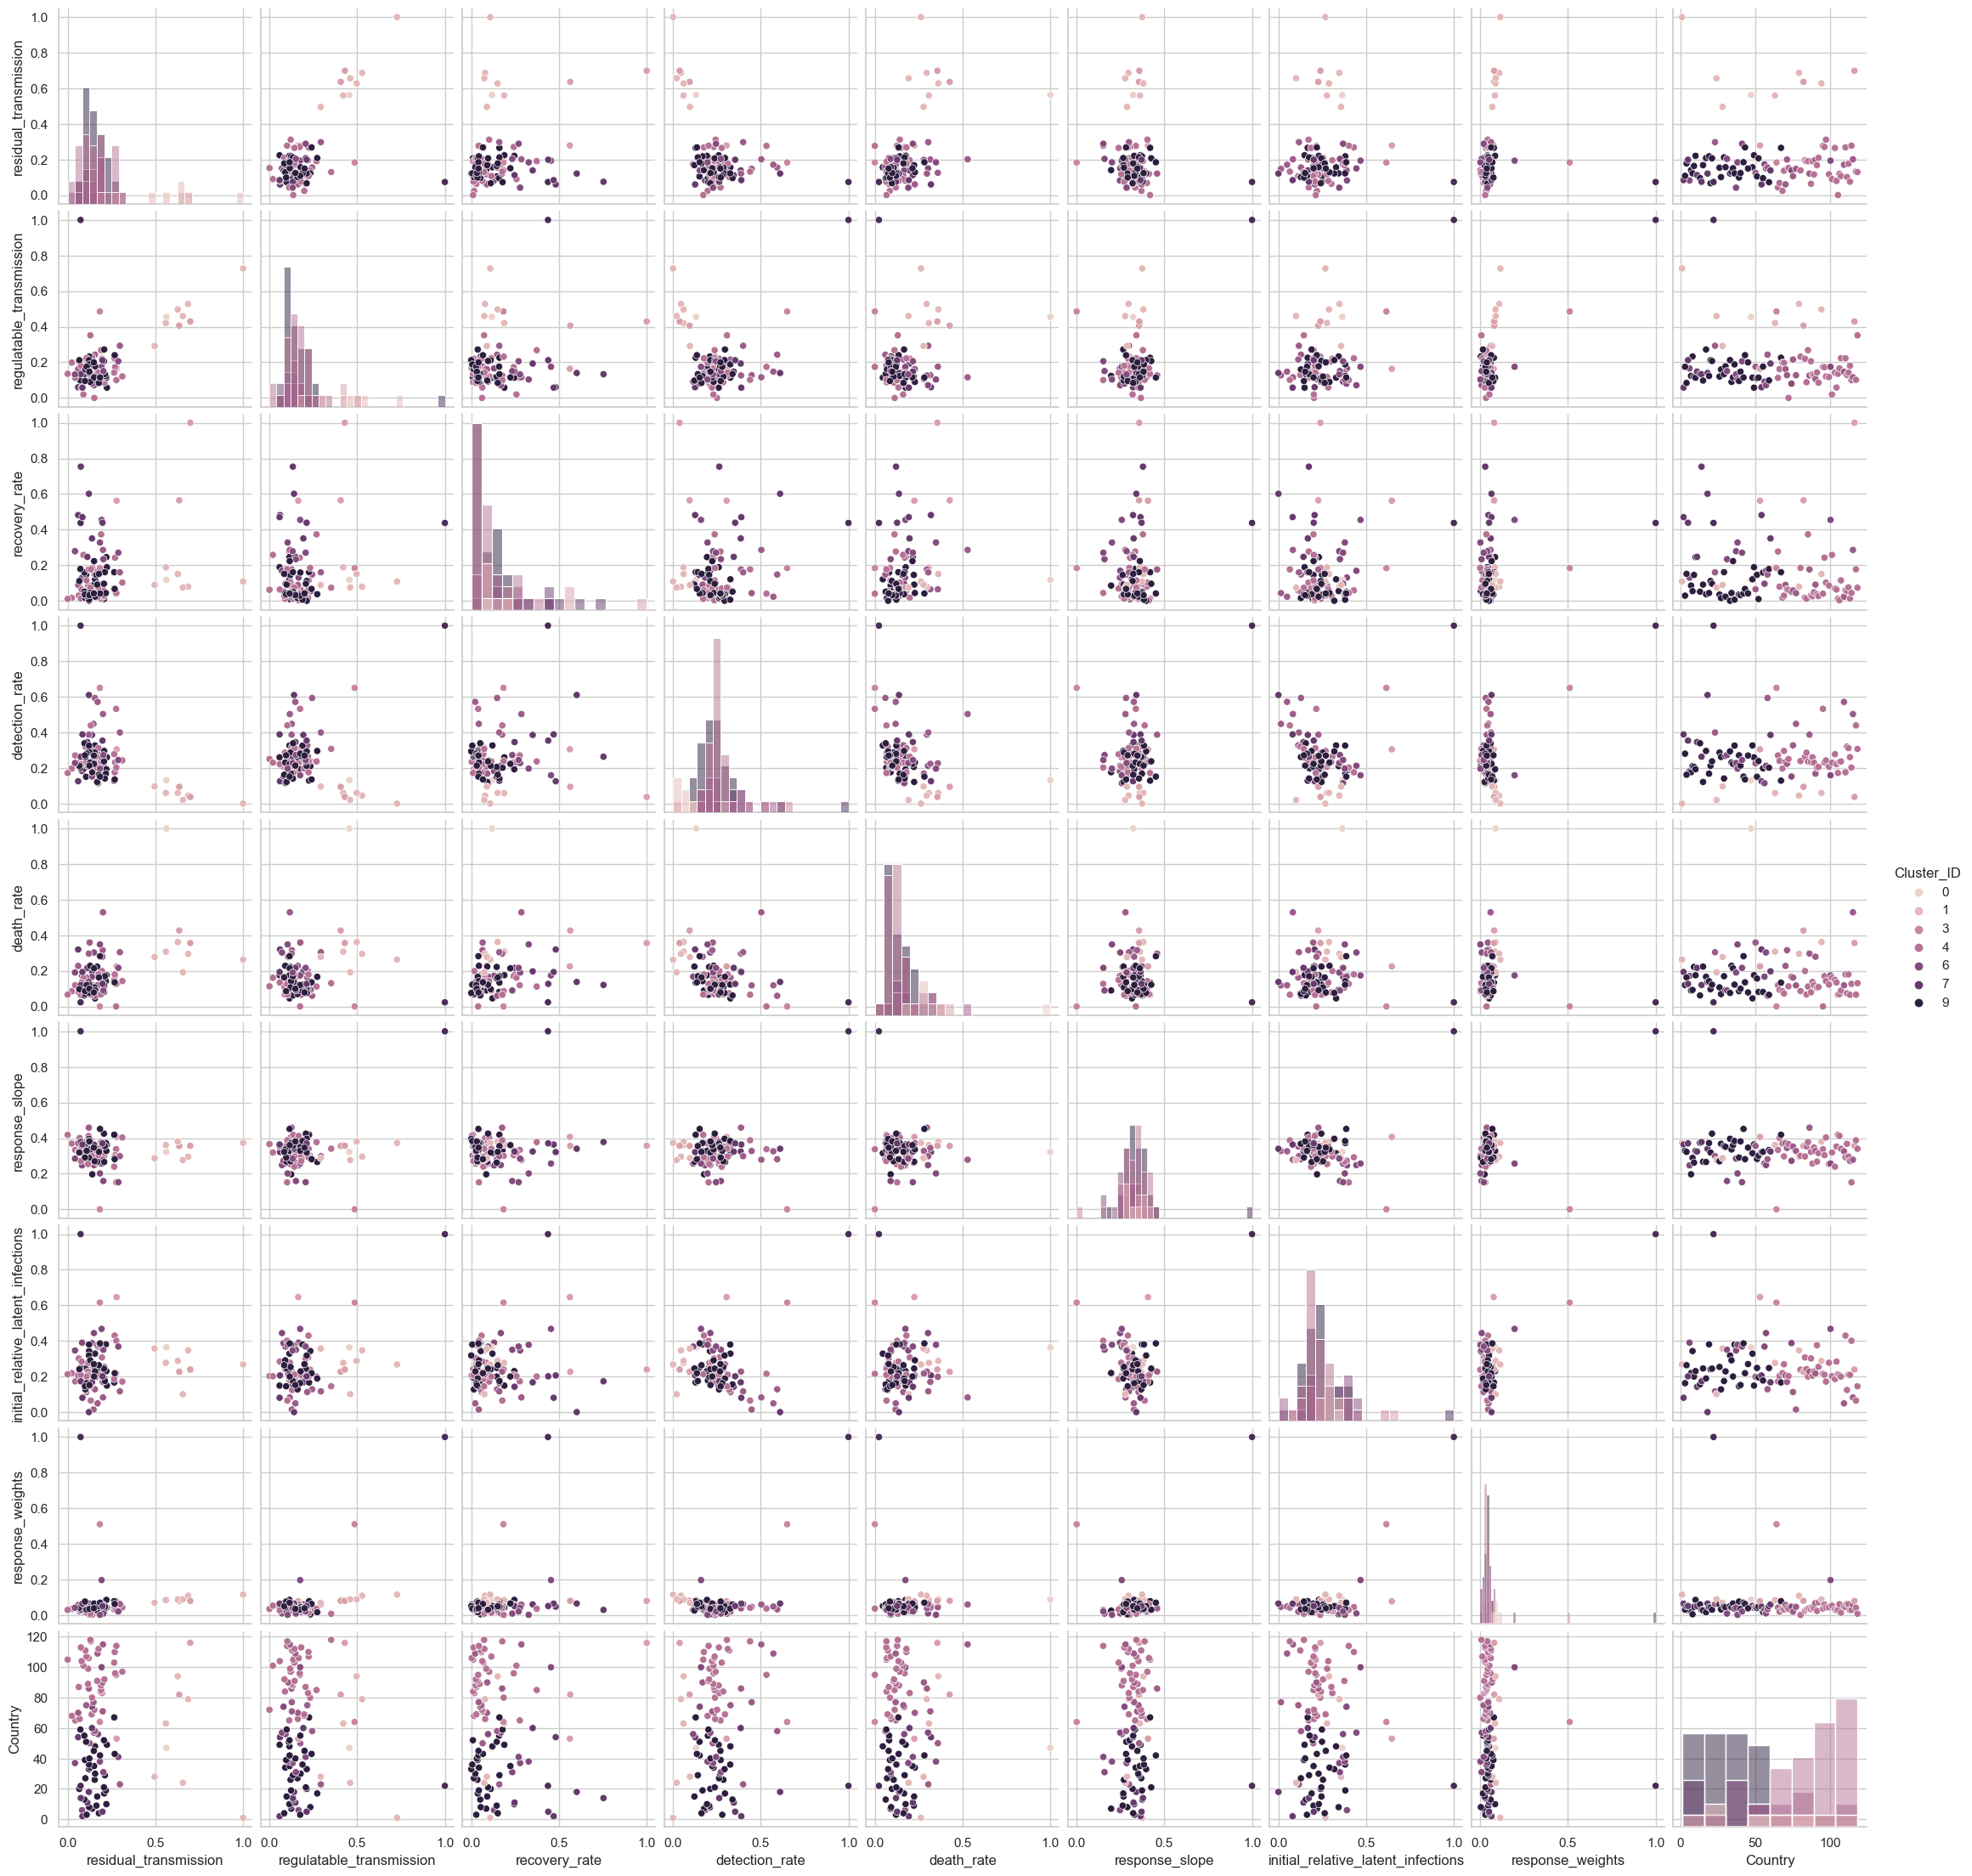

In [137]:
import seaborn as sns
import matplotlib.pyplot as plt

model = clusters[4]
y = model.fit_predict(X_mar, categorical = [1])
D2_mar['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(D2_mar['Cluster_ID'].value_counts())

# pairplot the cluster distribution

cluster_g = sns.pairplot(D2_mar, hue='Cluster_ID', diag_kind='hist')
plt.show()

So for **D2_apr** k = 8 is the best option

Cluster membership
0    39
6    32
4    15
1    13
5     8
3     5
7     5
2     1
Name: Cluster_ID, dtype: int64


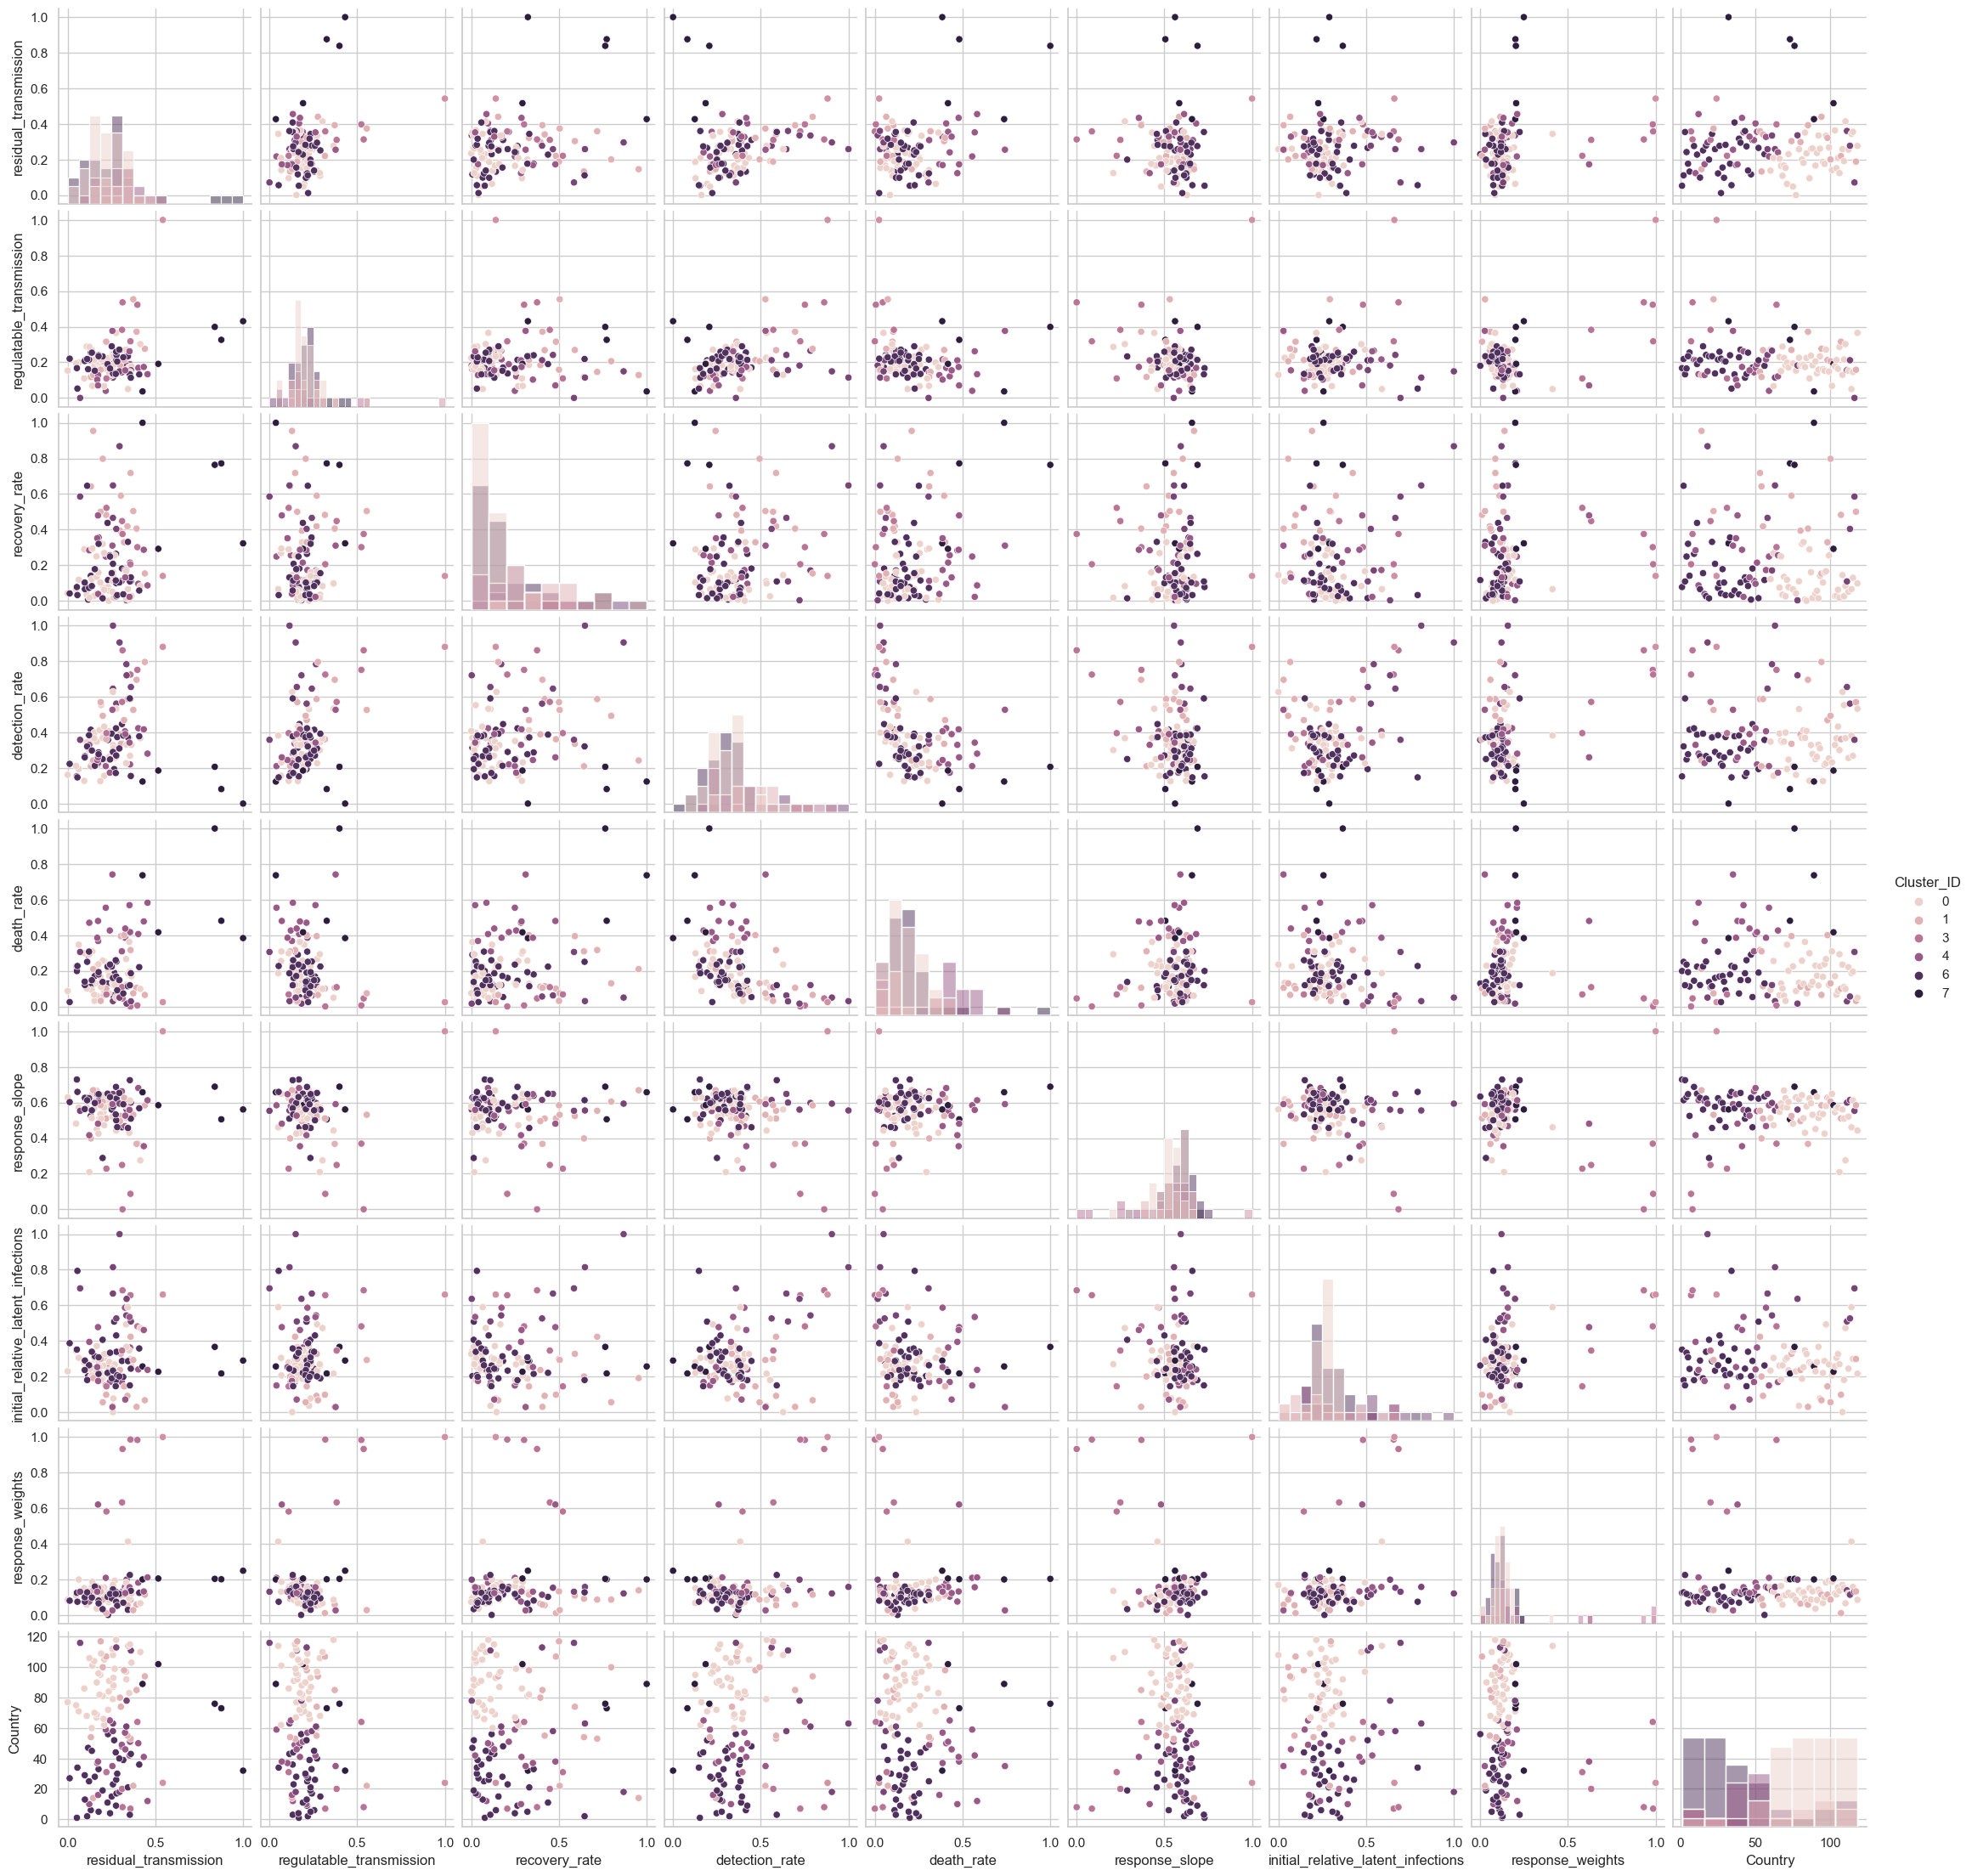

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt

model = clusters[3]
y = model.fit_predict(X_apr, categorical = [1])
D2_apr['Cluster_ID'] = y

# how many records are in each cluster
print("Cluster membership")
print(D2_apr['Cluster_ID'].value_counts())

# pairplot the cluster distribution

cluster_g = sns.pairplot(D2_apr, hue='Cluster_ID', diag_kind='hist')
plt.show()

Distribution for cluster 0


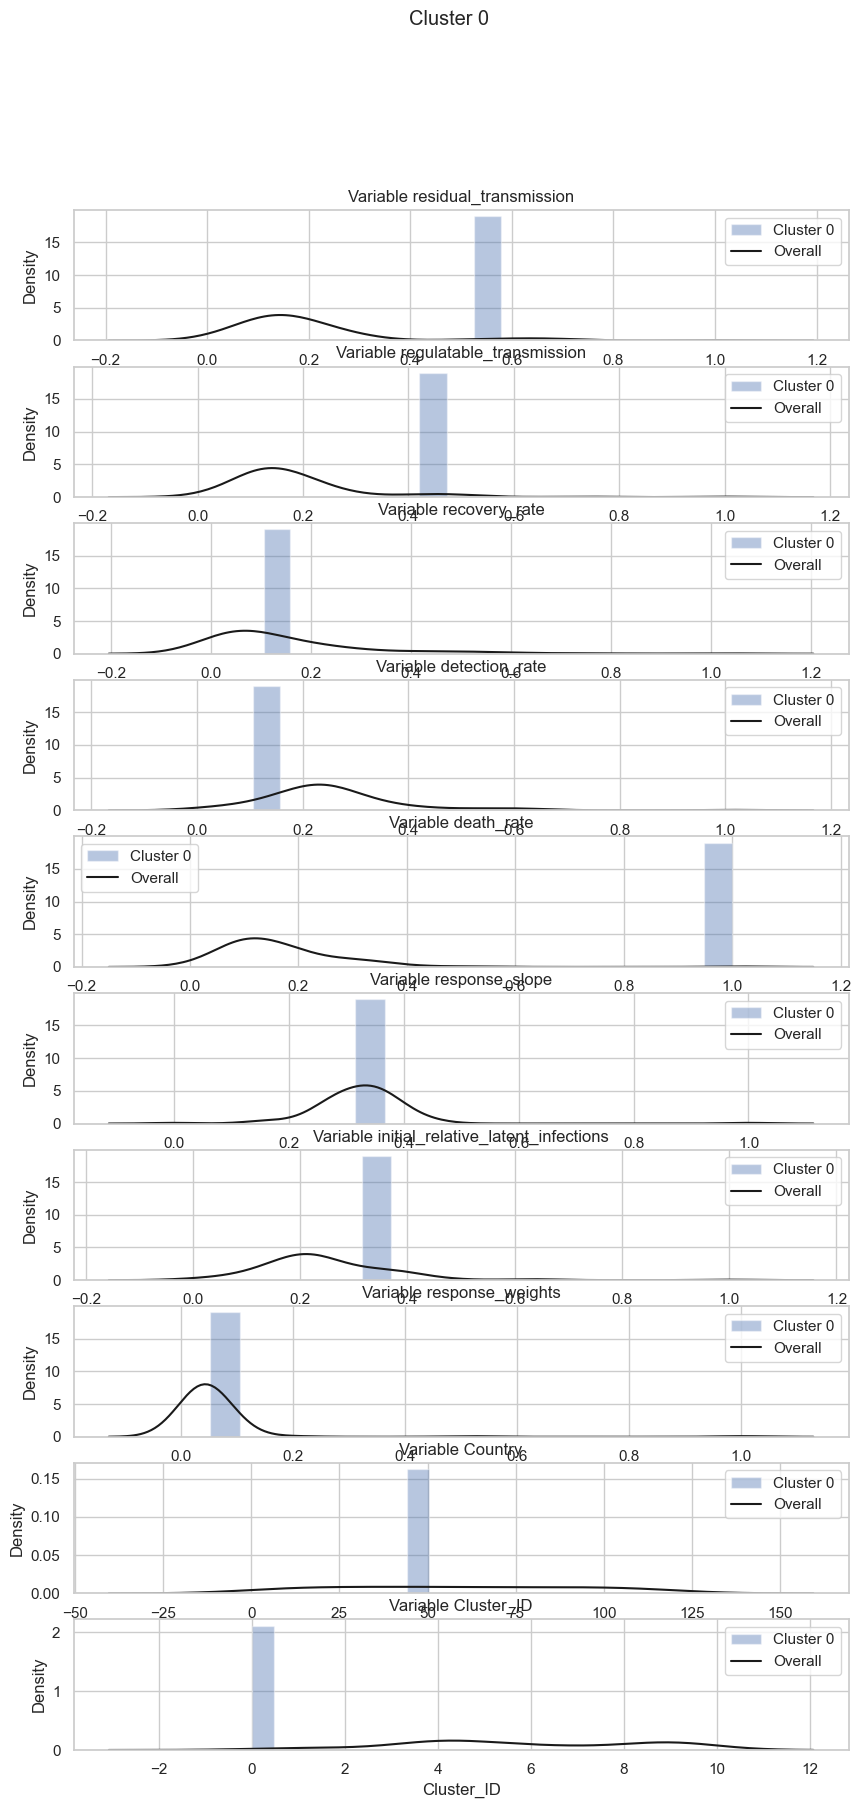

Distribution for cluster 1


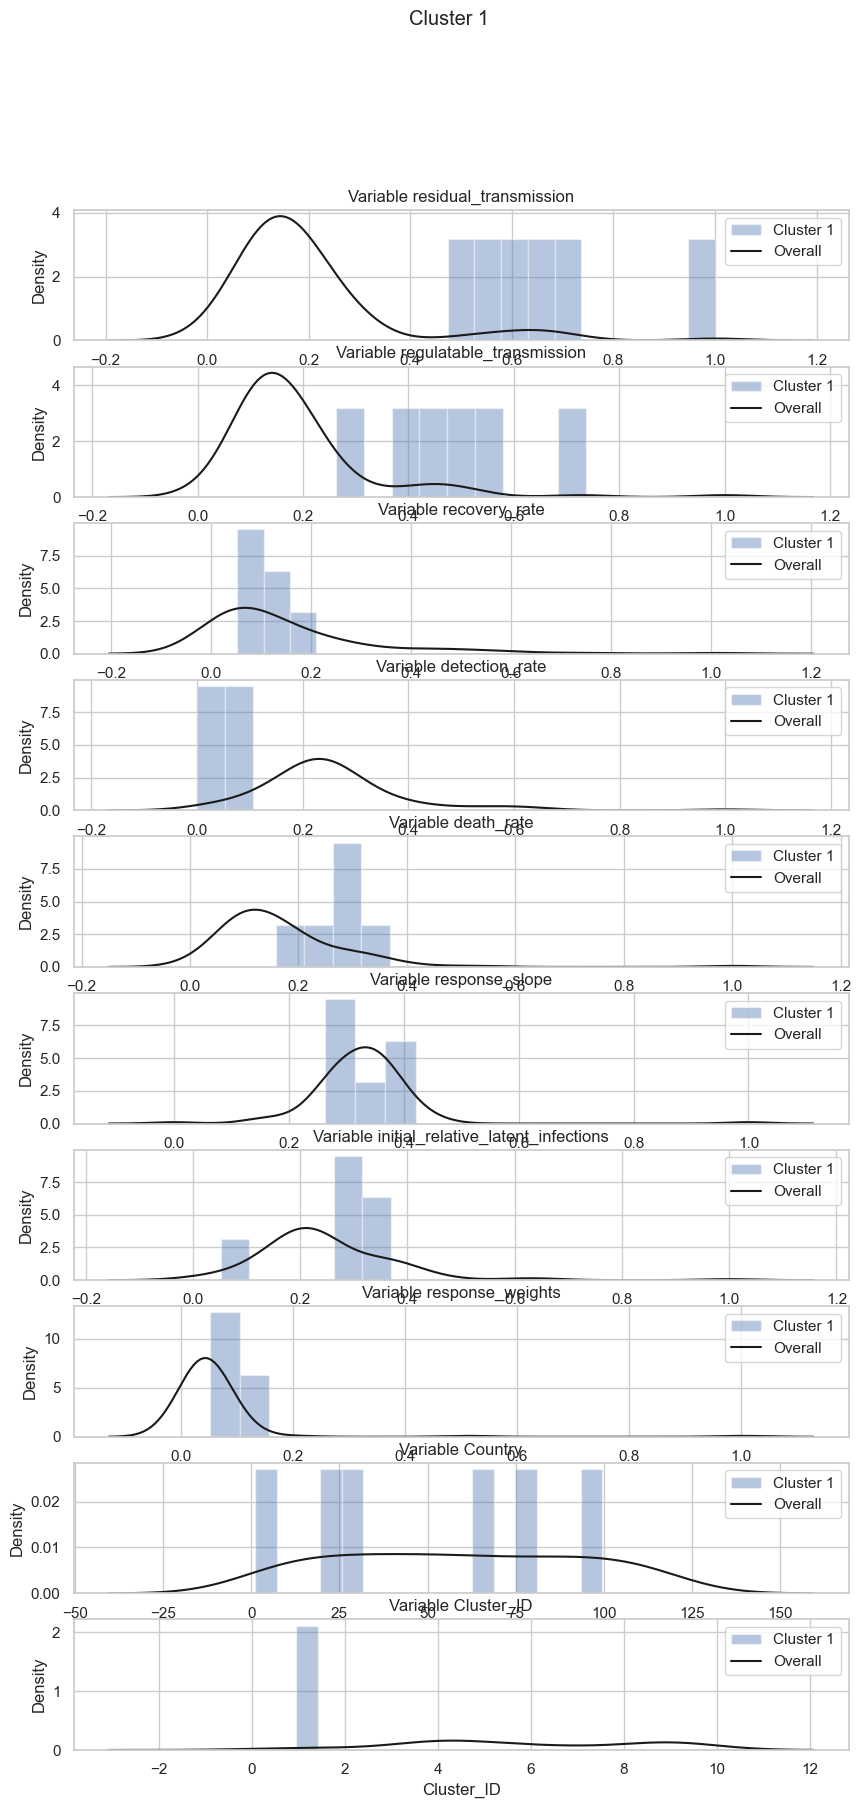

Distribution for cluster 2


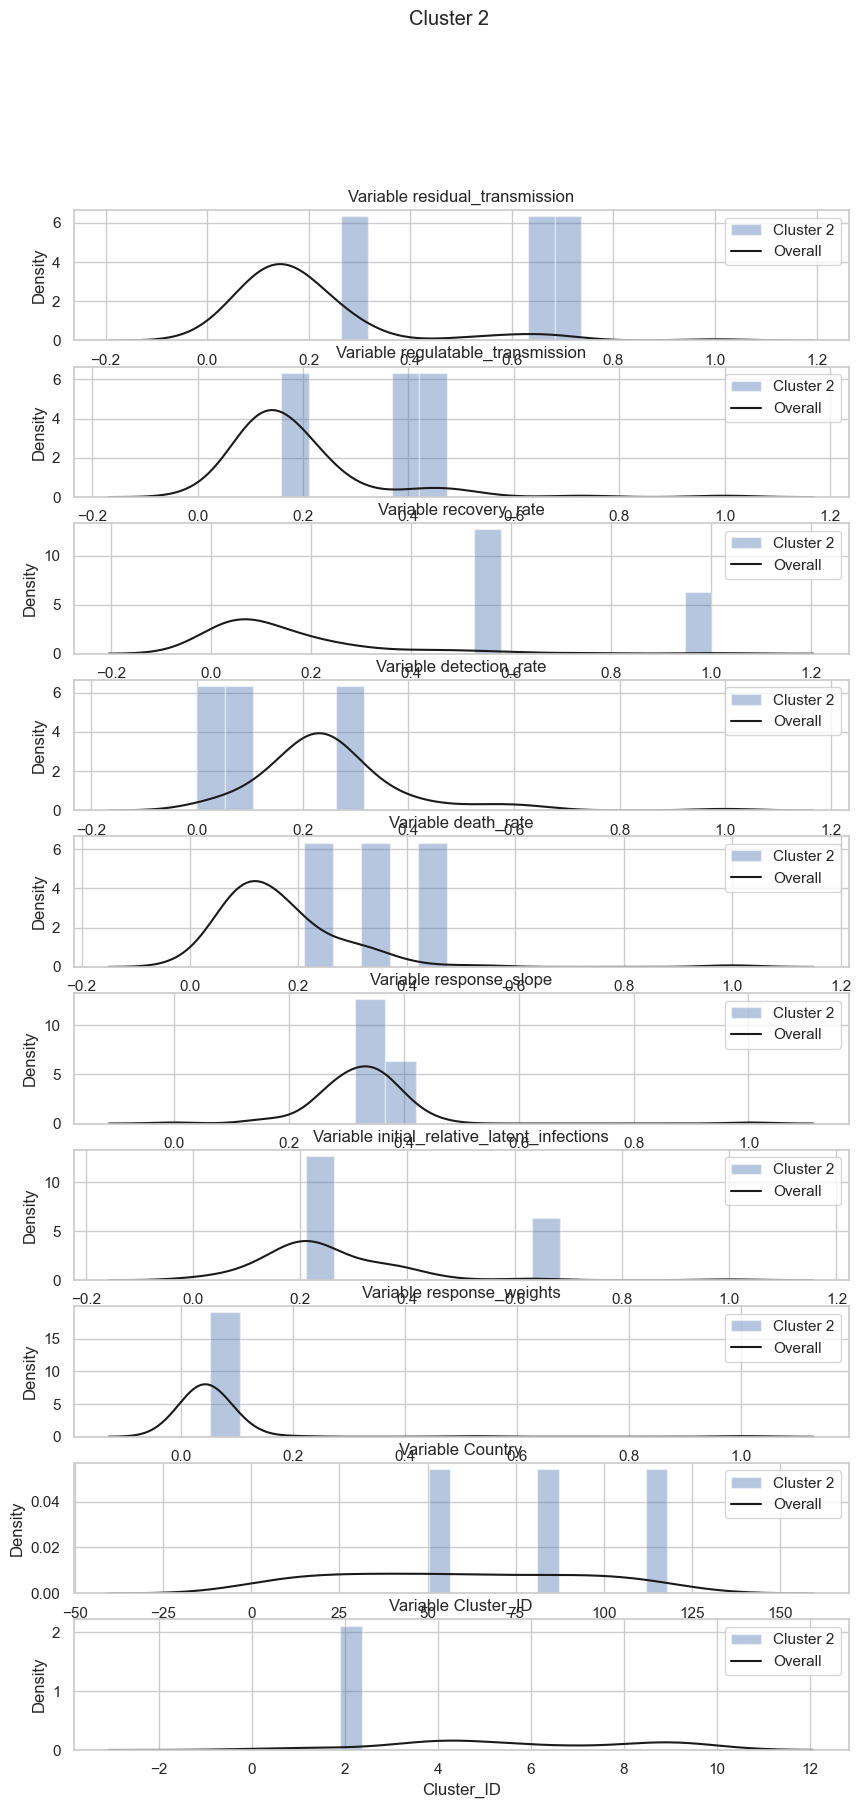

Distribution for cluster 3


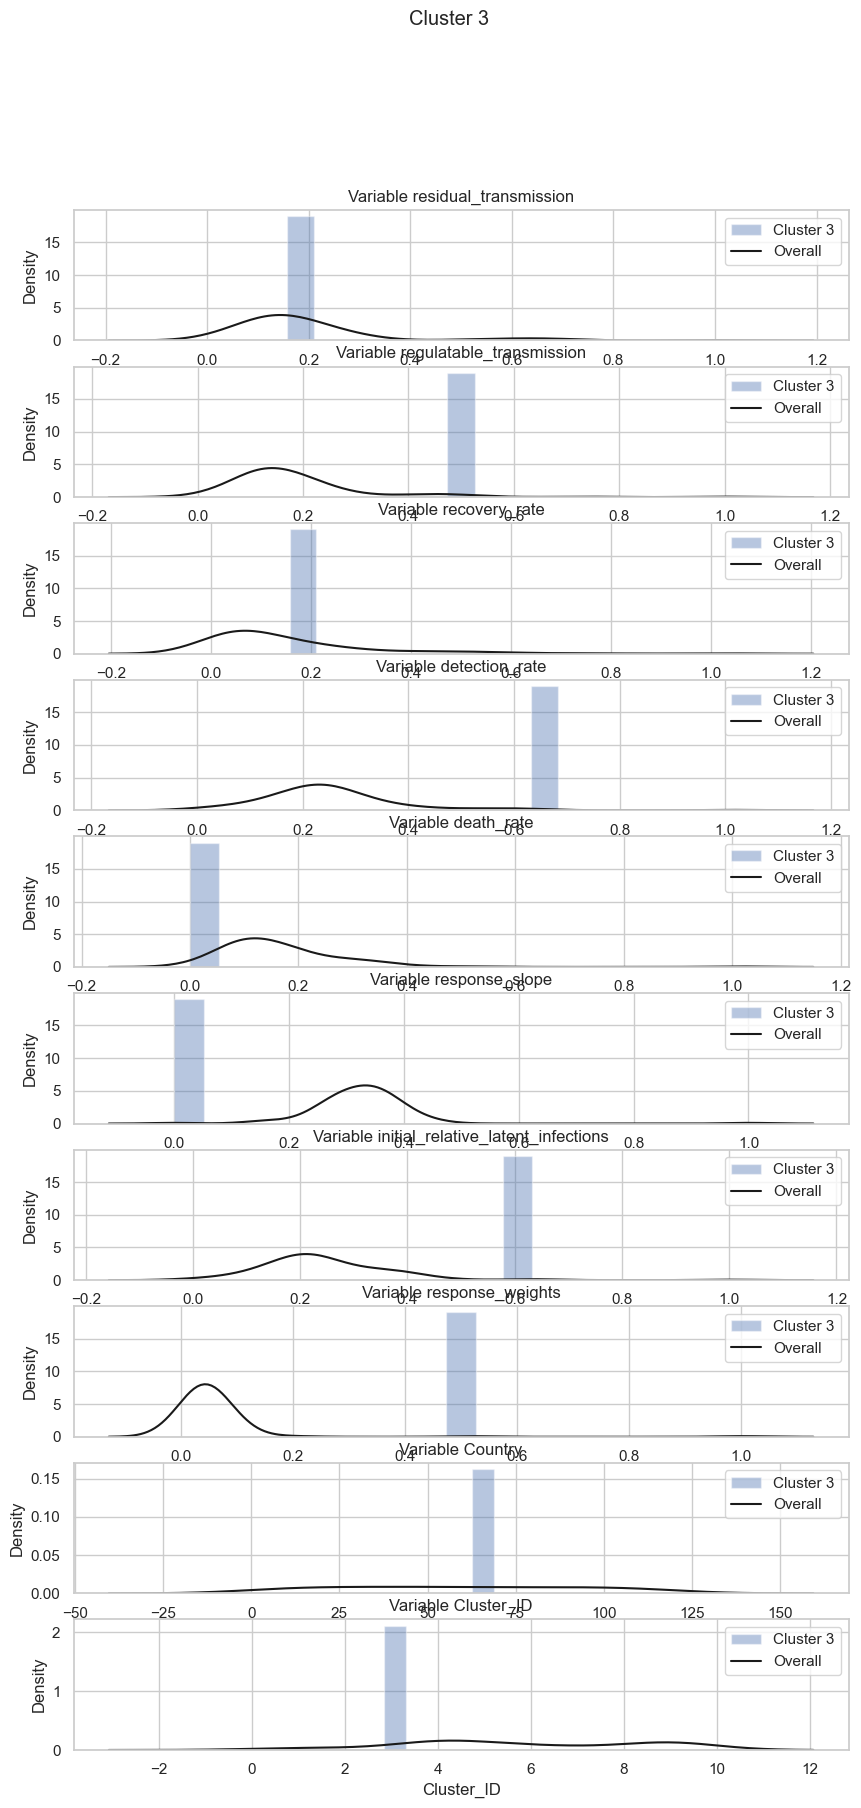

Distribution for cluster 4


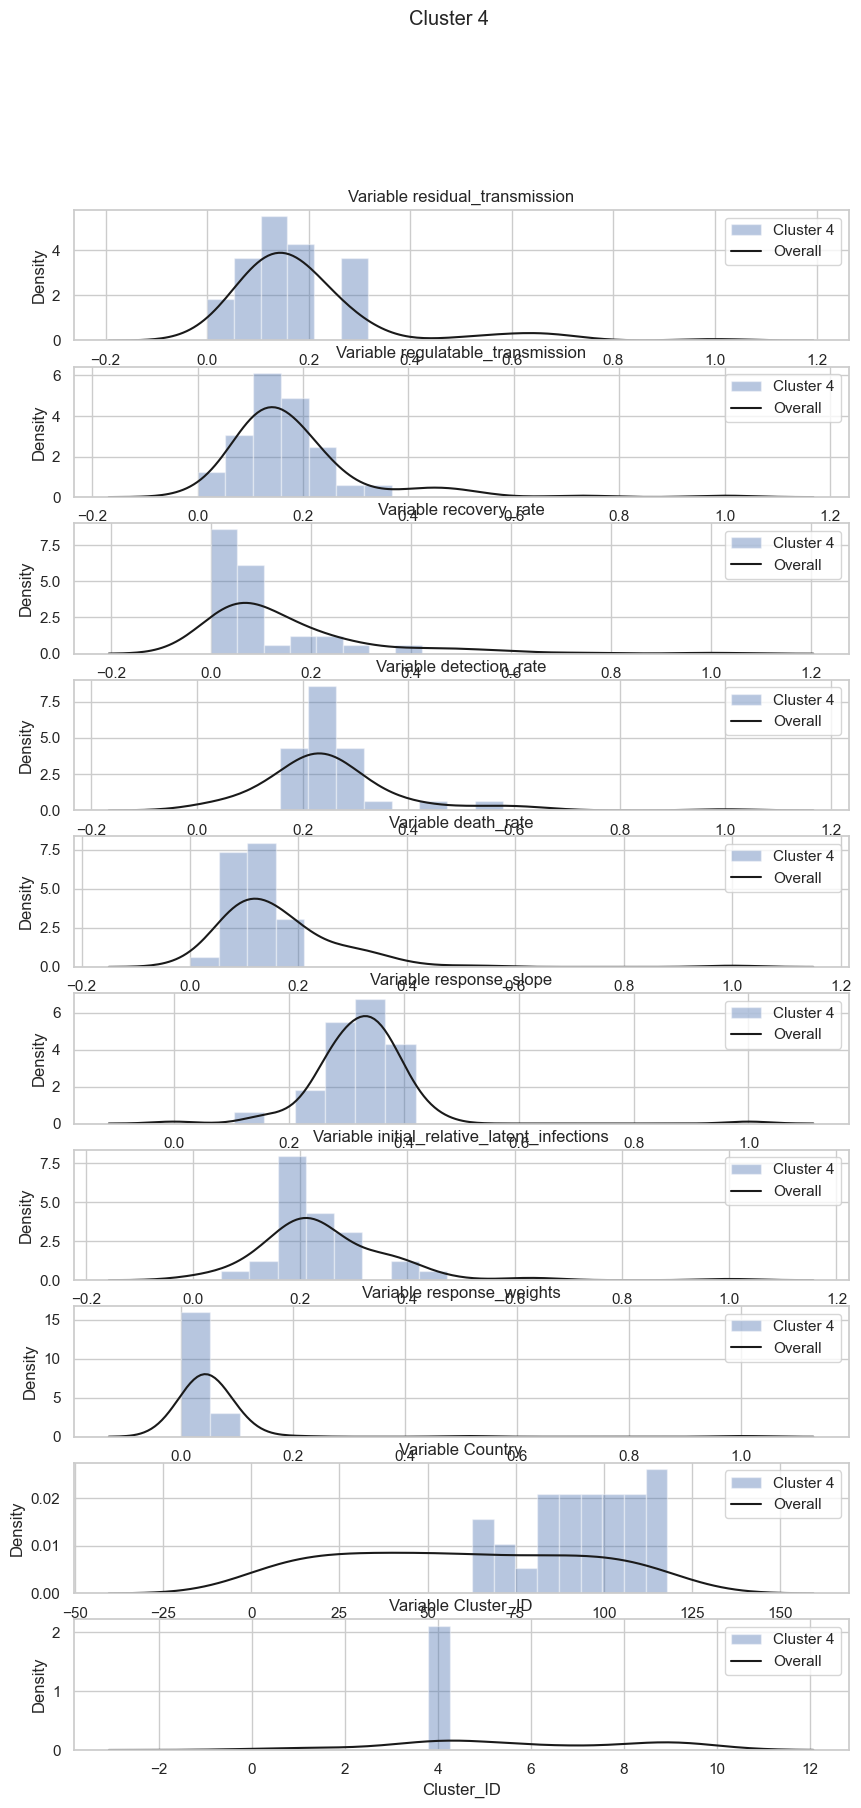

Distribution for cluster 5


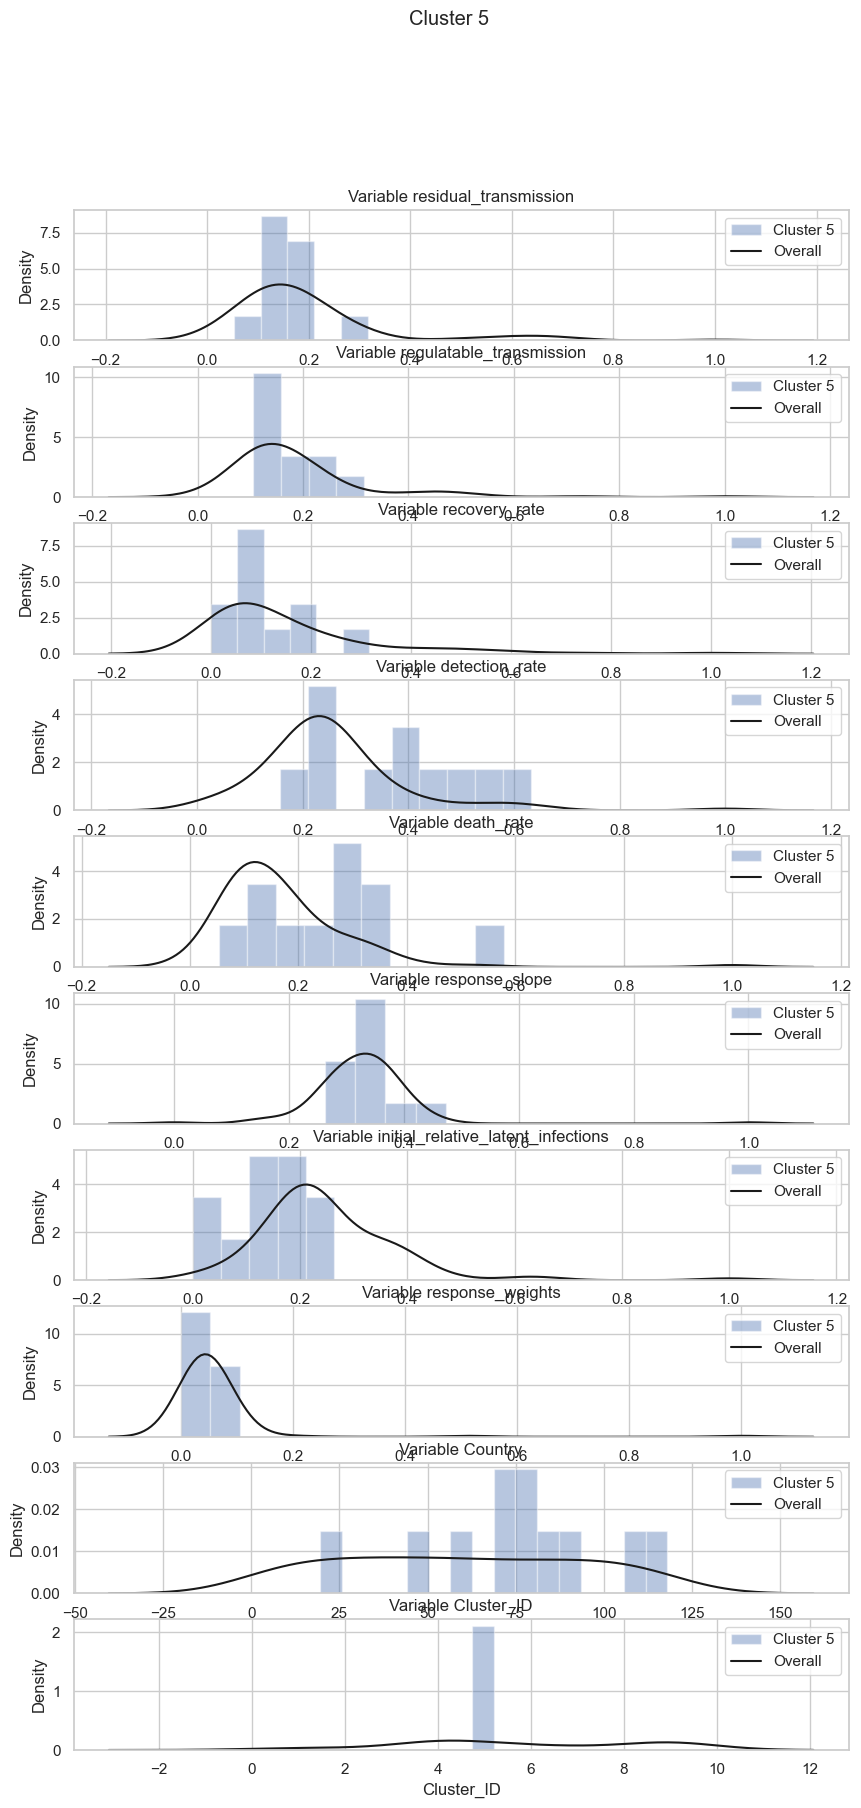

Distribution for cluster 6


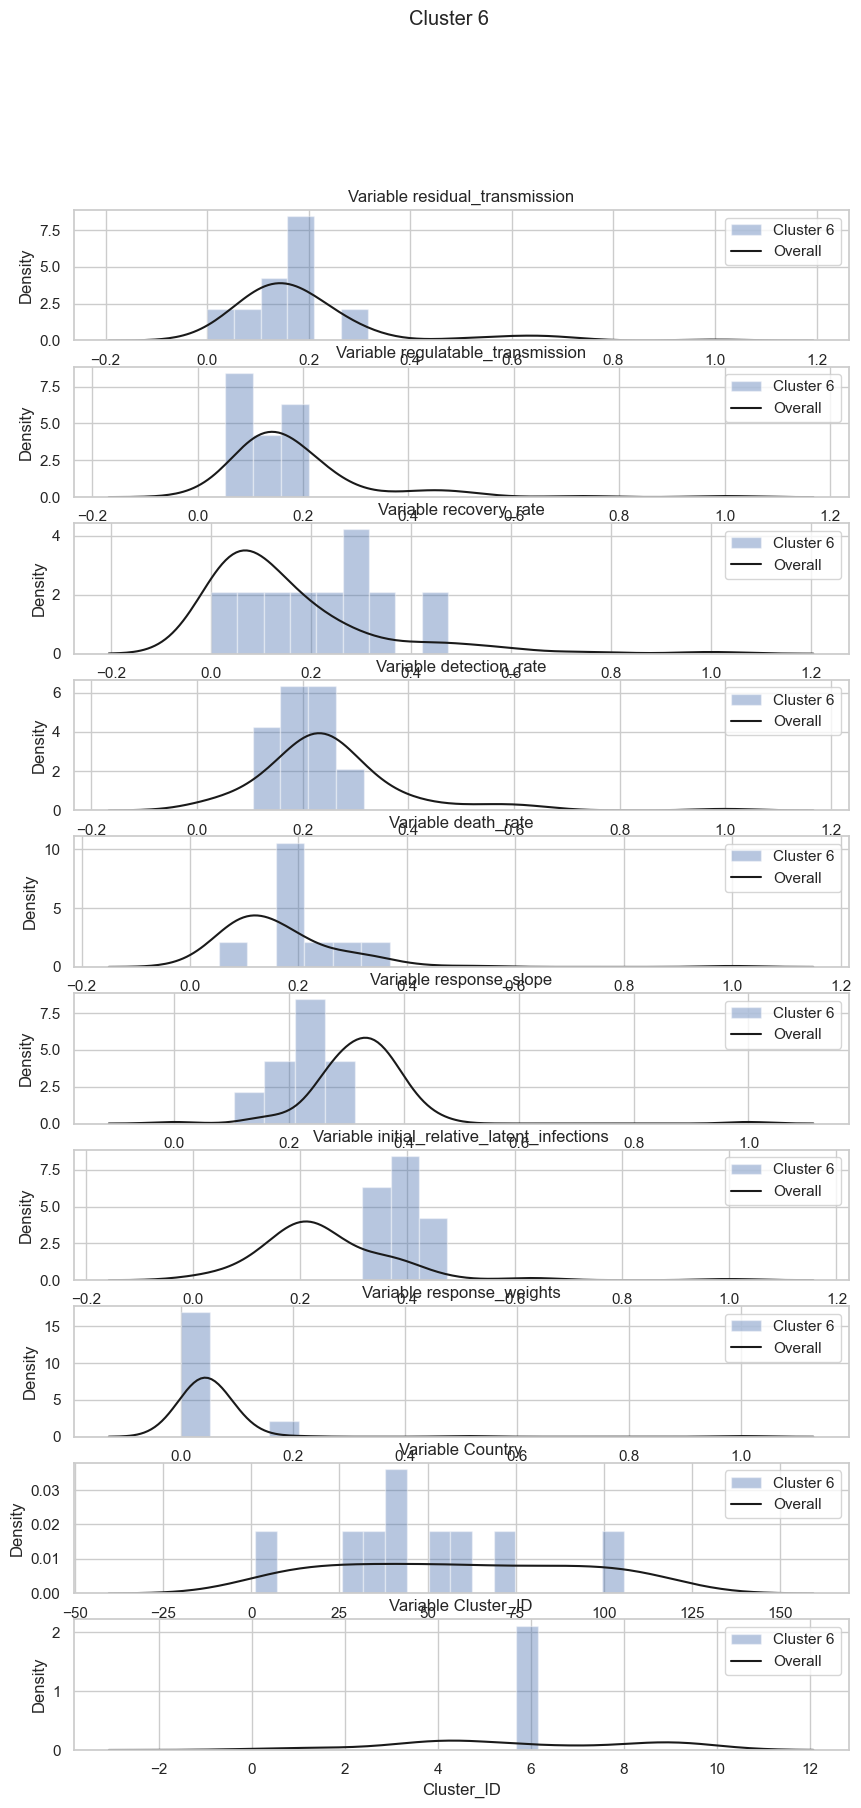

Distribution for cluster 7


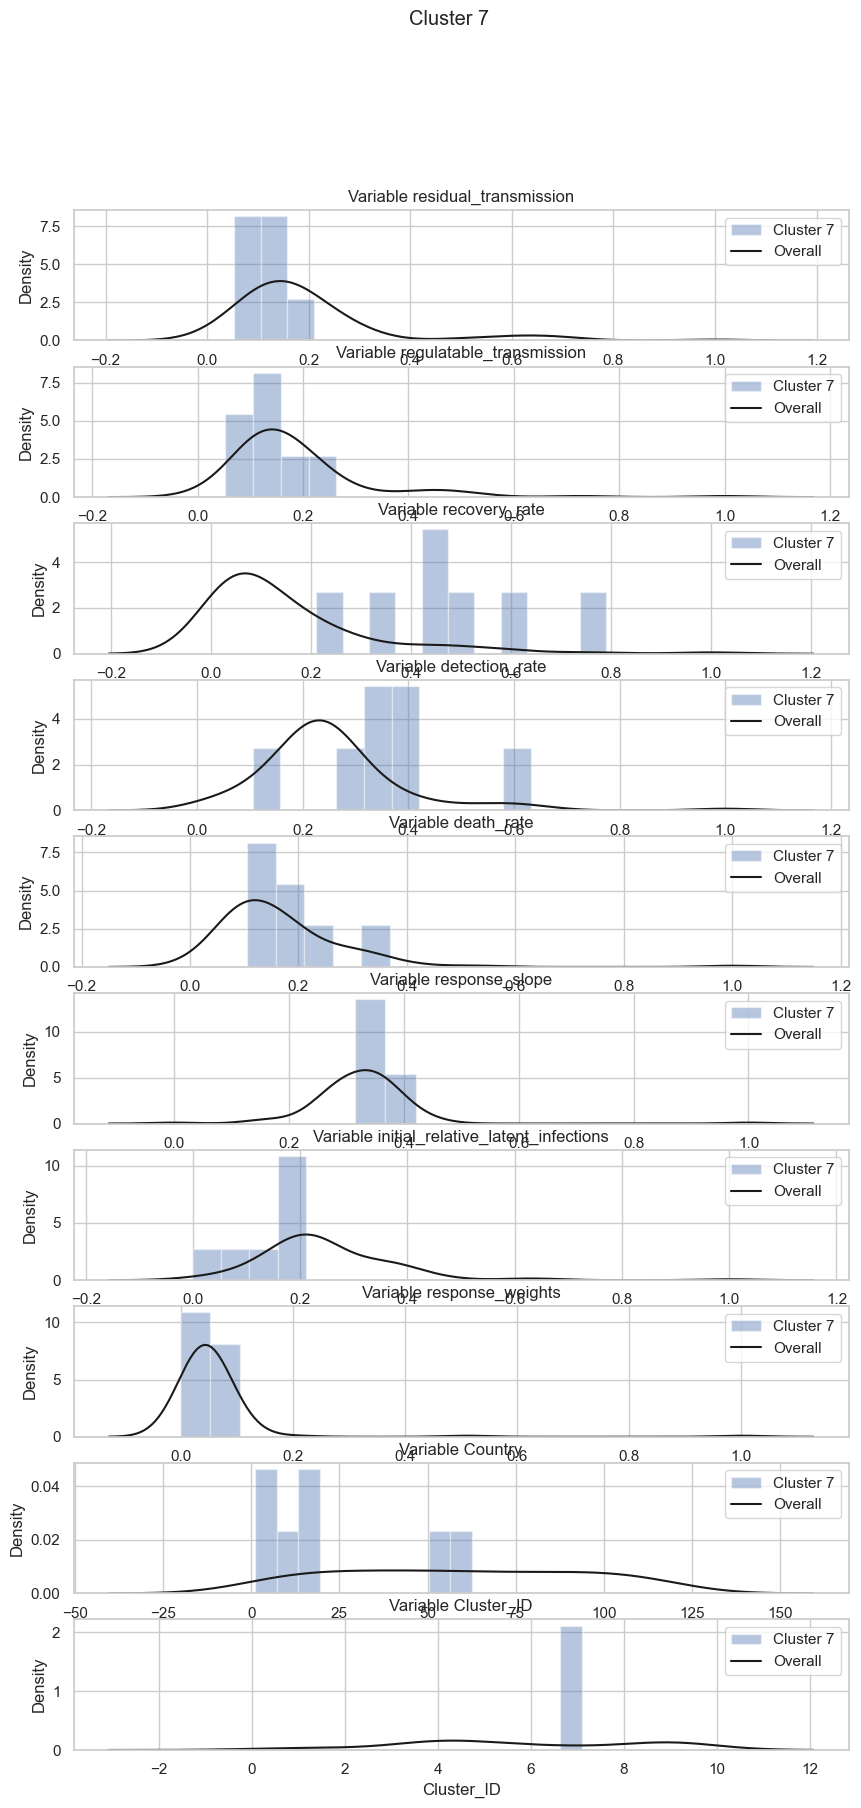

Distribution for cluster 8


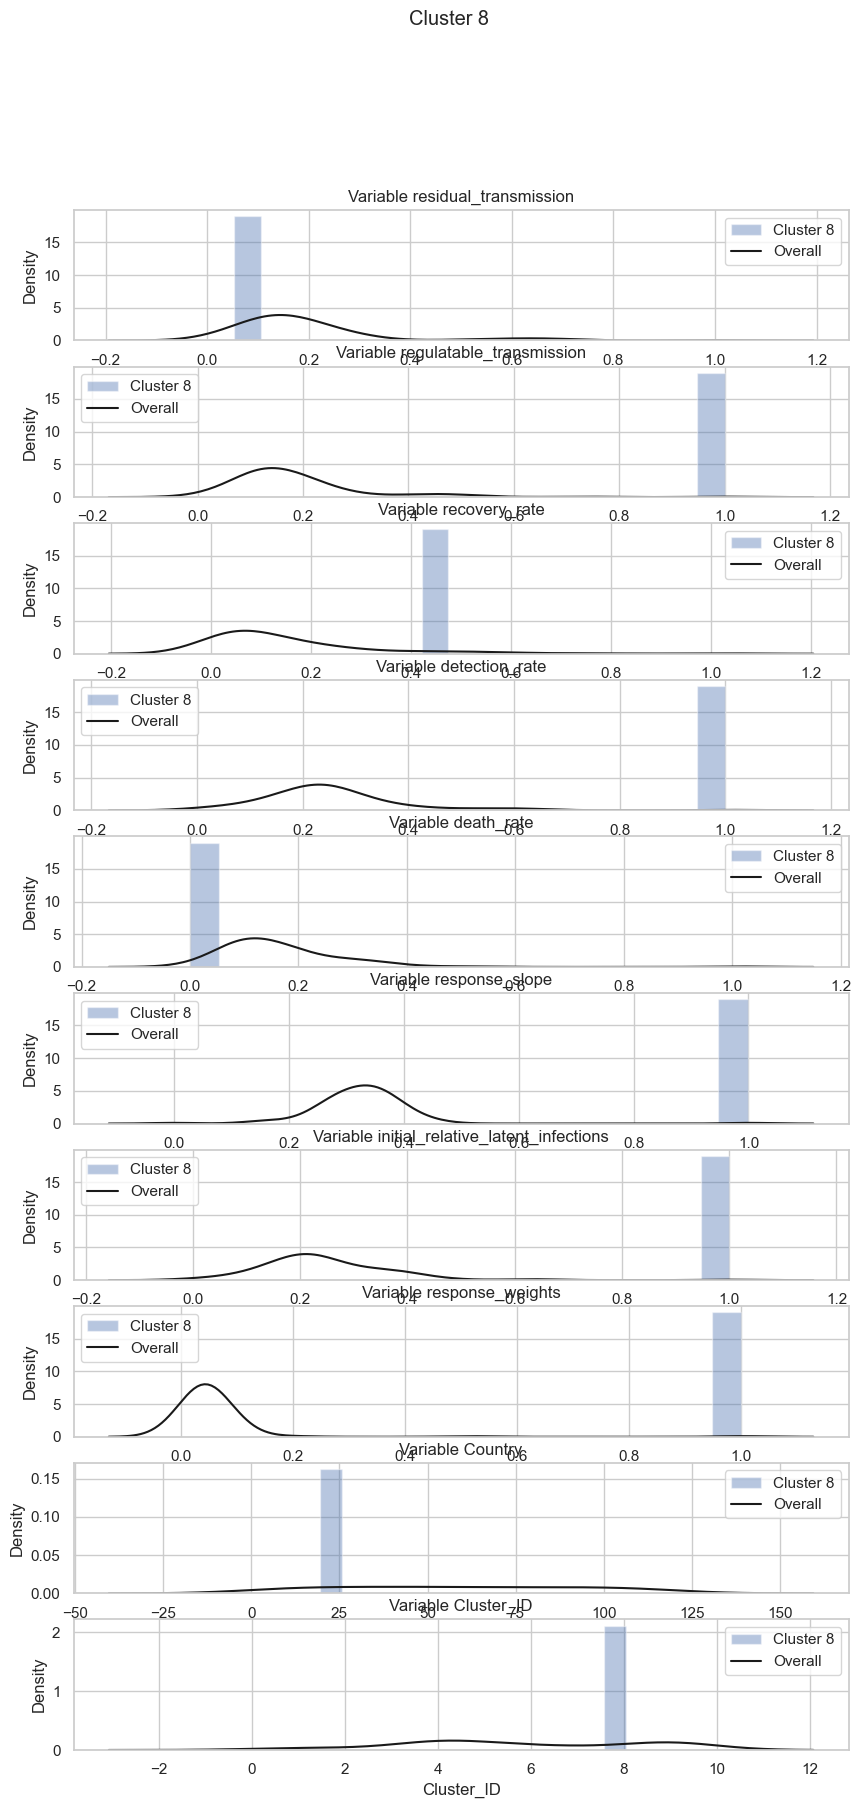

Distribution for cluster 9


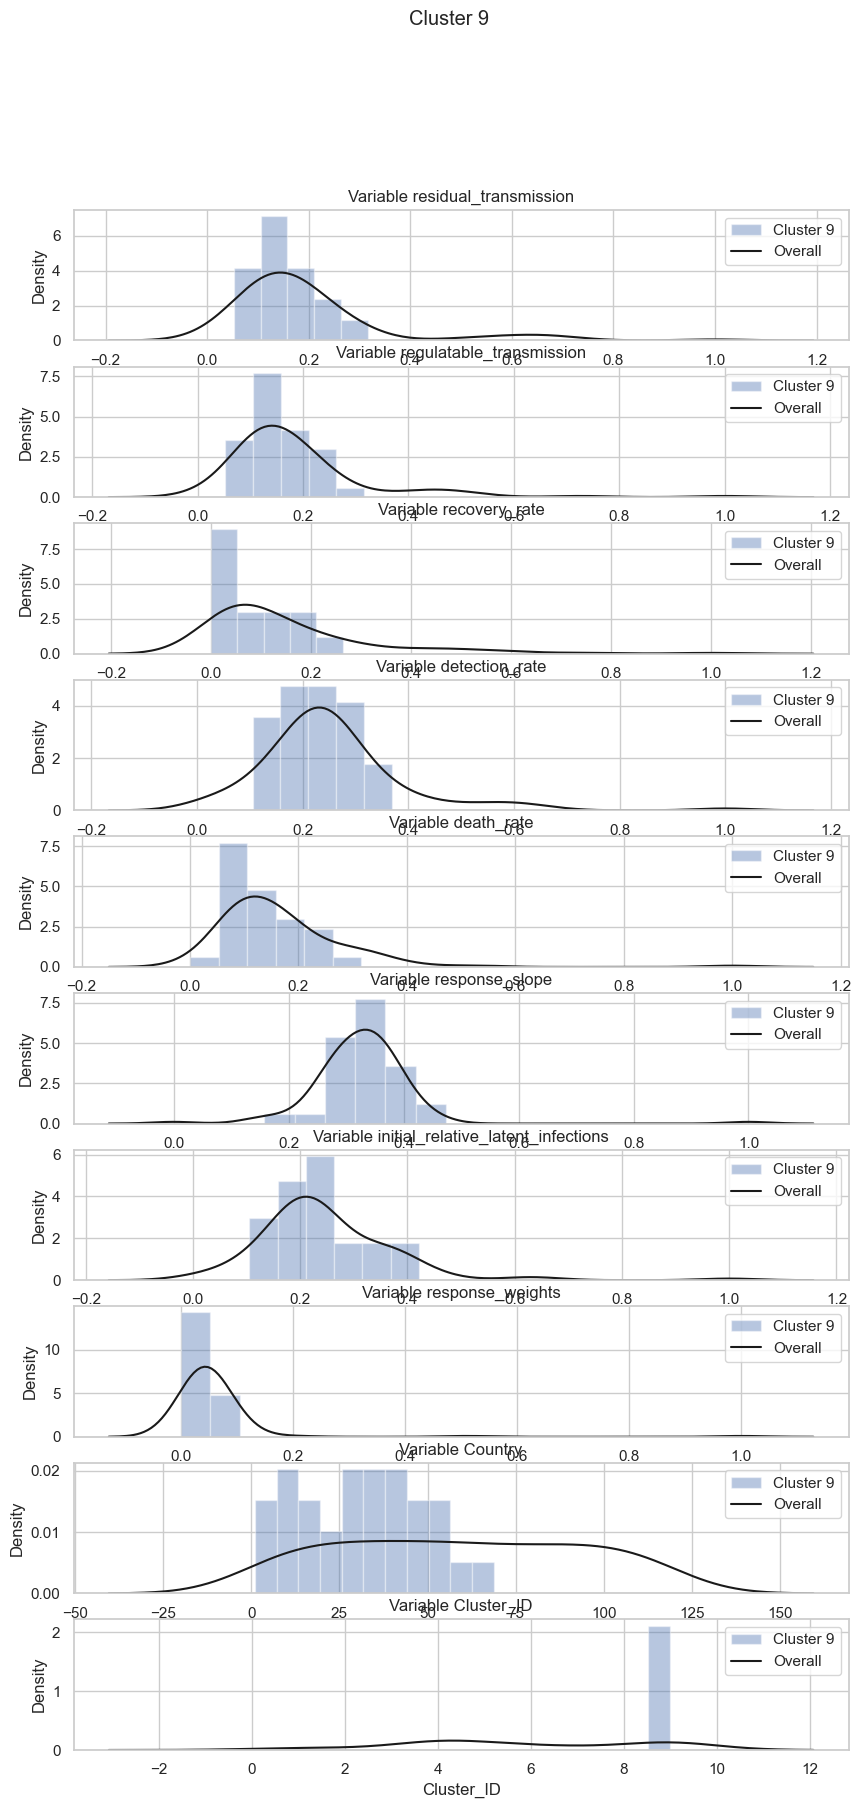

In [139]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = D2_mar.columns.tolist()
n_bins = 20

clusters_to_inspect = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    
    # create subplots
    fig, ax = plt.subplots(nrows=len(cols), figsize=(10, 2*len(cols)))
    fig.suptitle("Cluster {}".format(cluster))
    
    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(D2_mar[col]), max(D2_mar[col]), n_bins)
        # plot distribution of the cluster using histogram
        sns.distplot(D2_mar[D2_mar['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde=False, label='Cluster {}'.format(cluster))
        # plot the normal distribution with a black line
        sns.distplot(D2_mar[col], bins=bins, ax=ax[j], hist=False, color="k", label='Overall')
        ax[j].legend()
        ax[j].set_title("Variable {}".format(col))
    
    plt.show()


Distribution for cluster 0


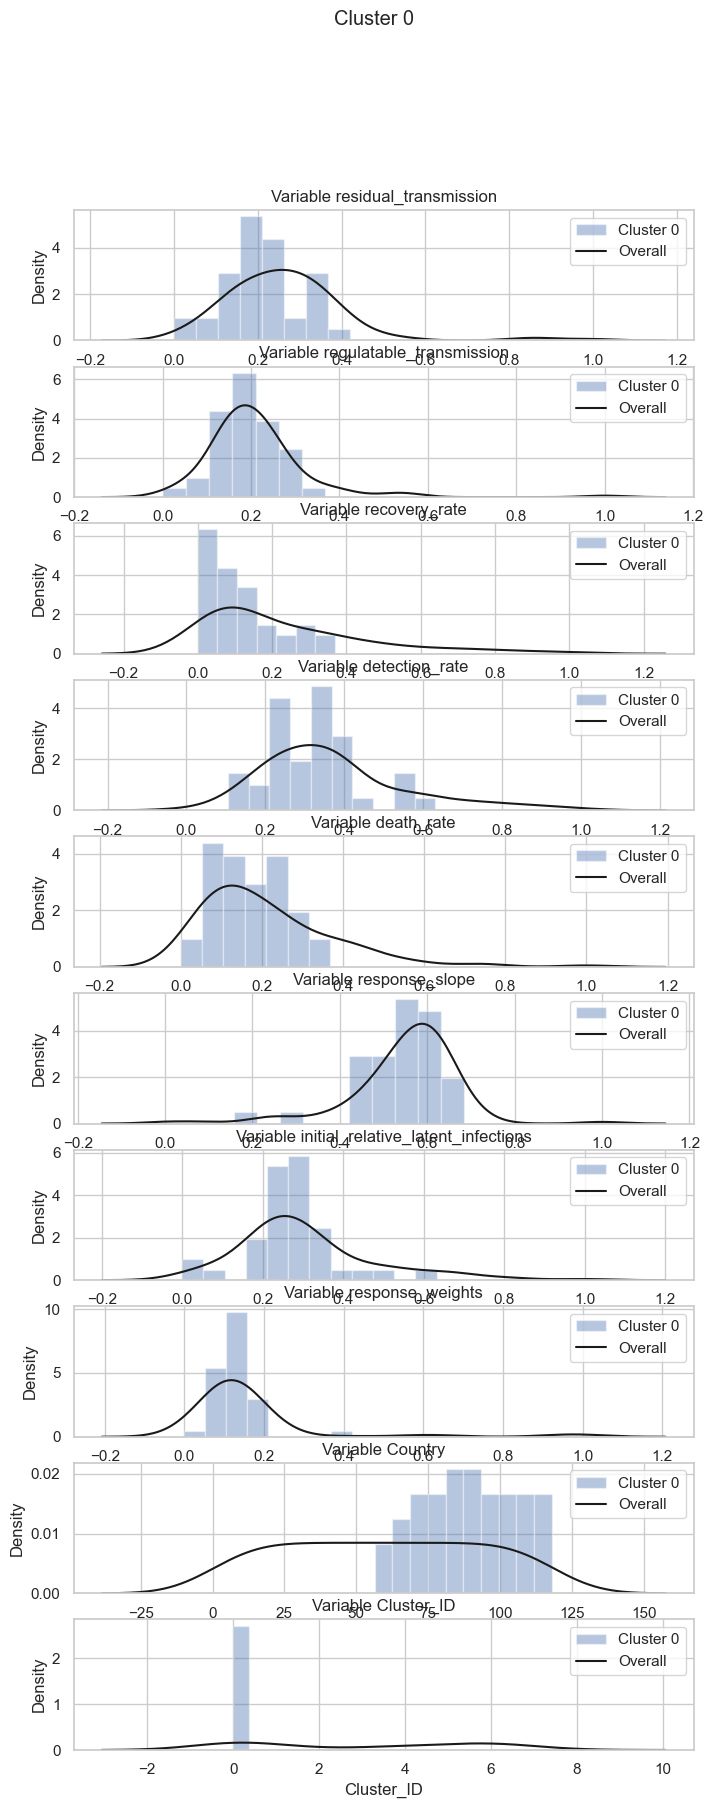

Distribution for cluster 1


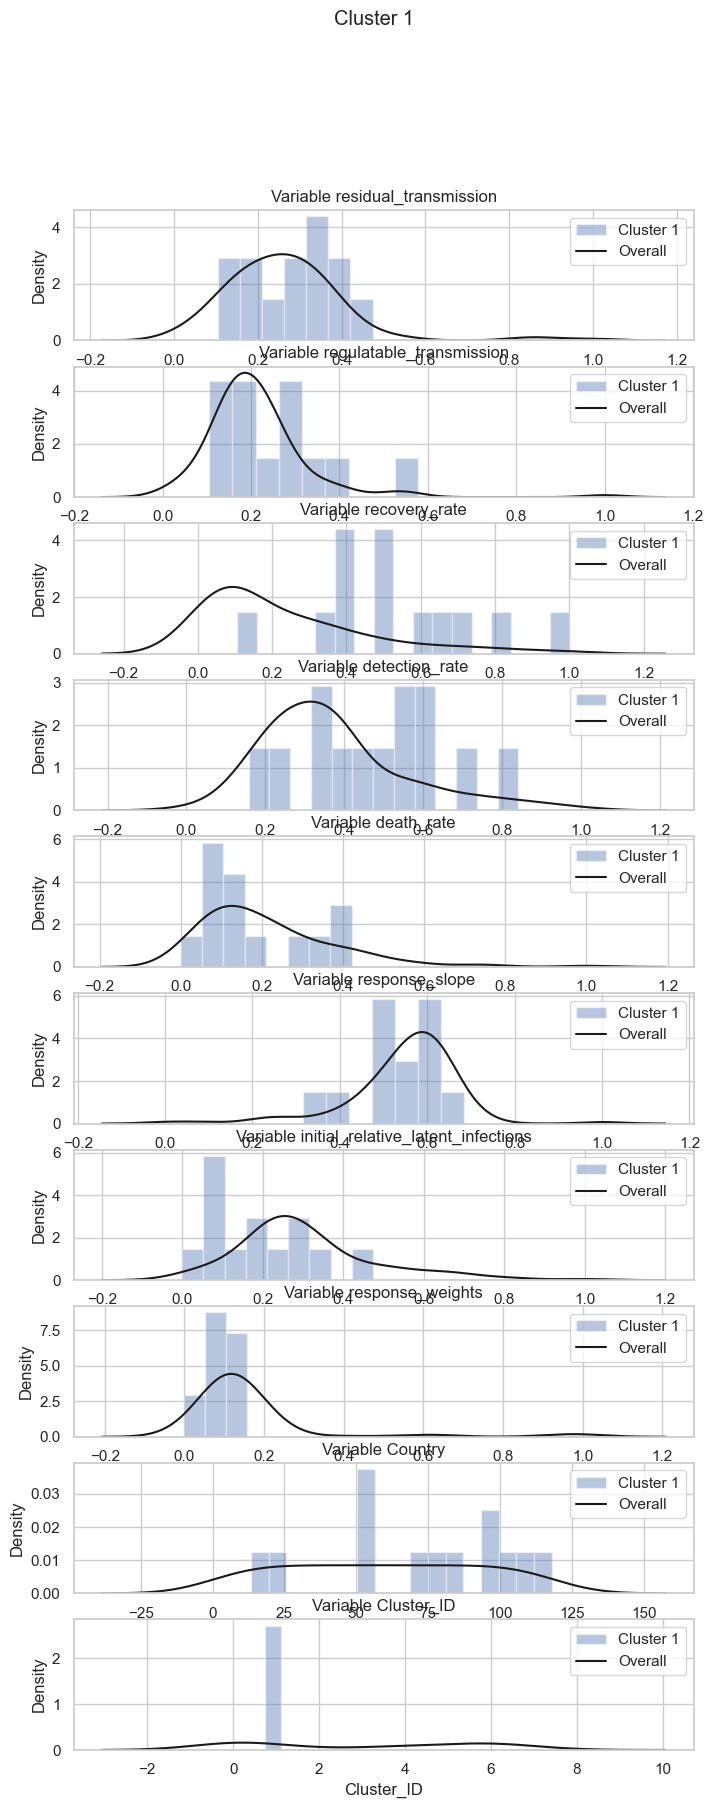

Distribution for cluster 2


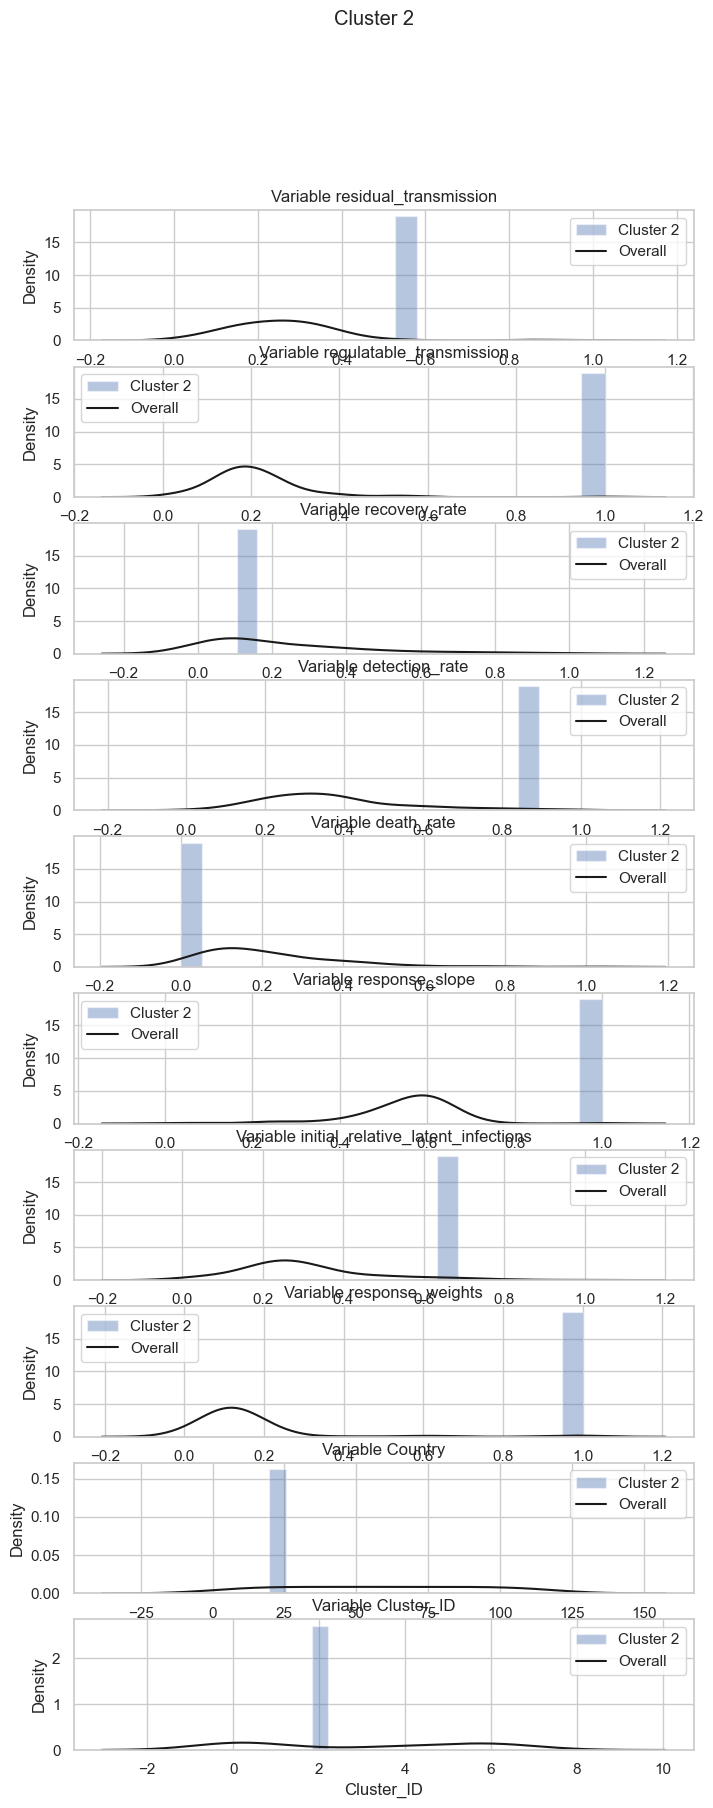

Distribution for cluster 3


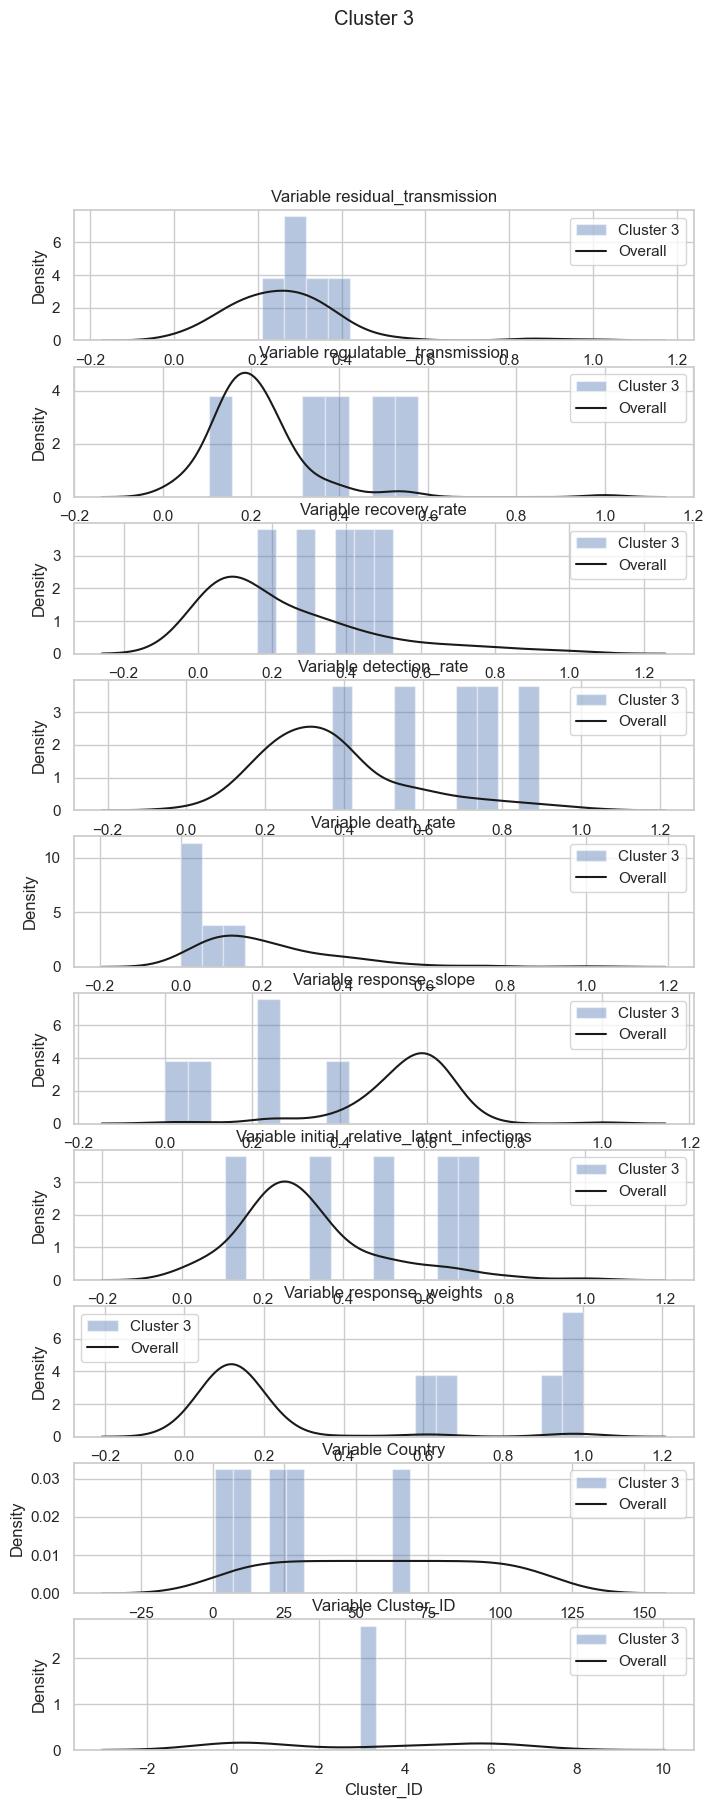

Distribution for cluster 4


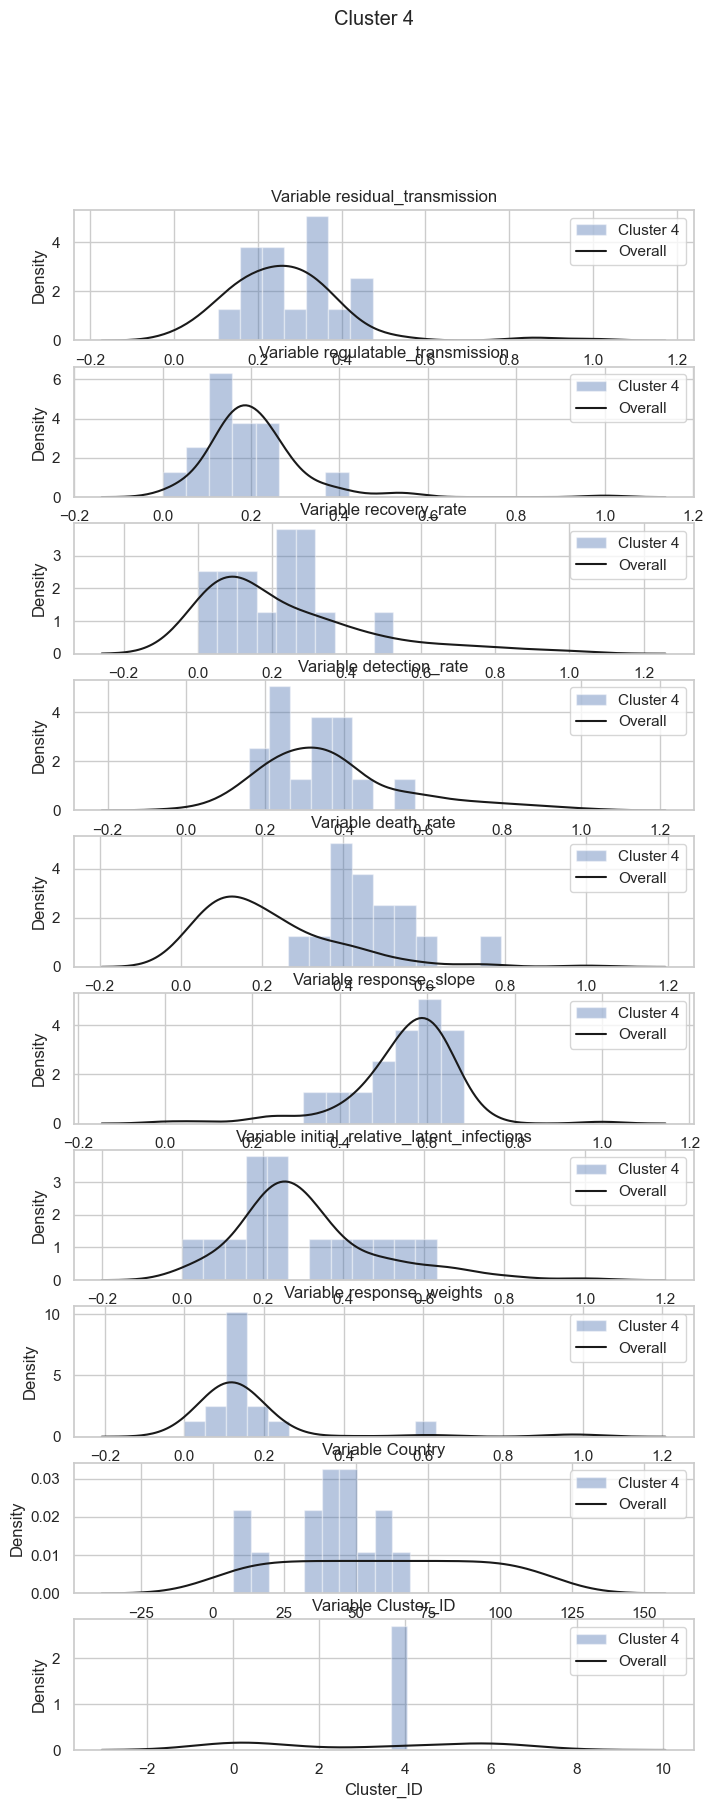

Distribution for cluster 5


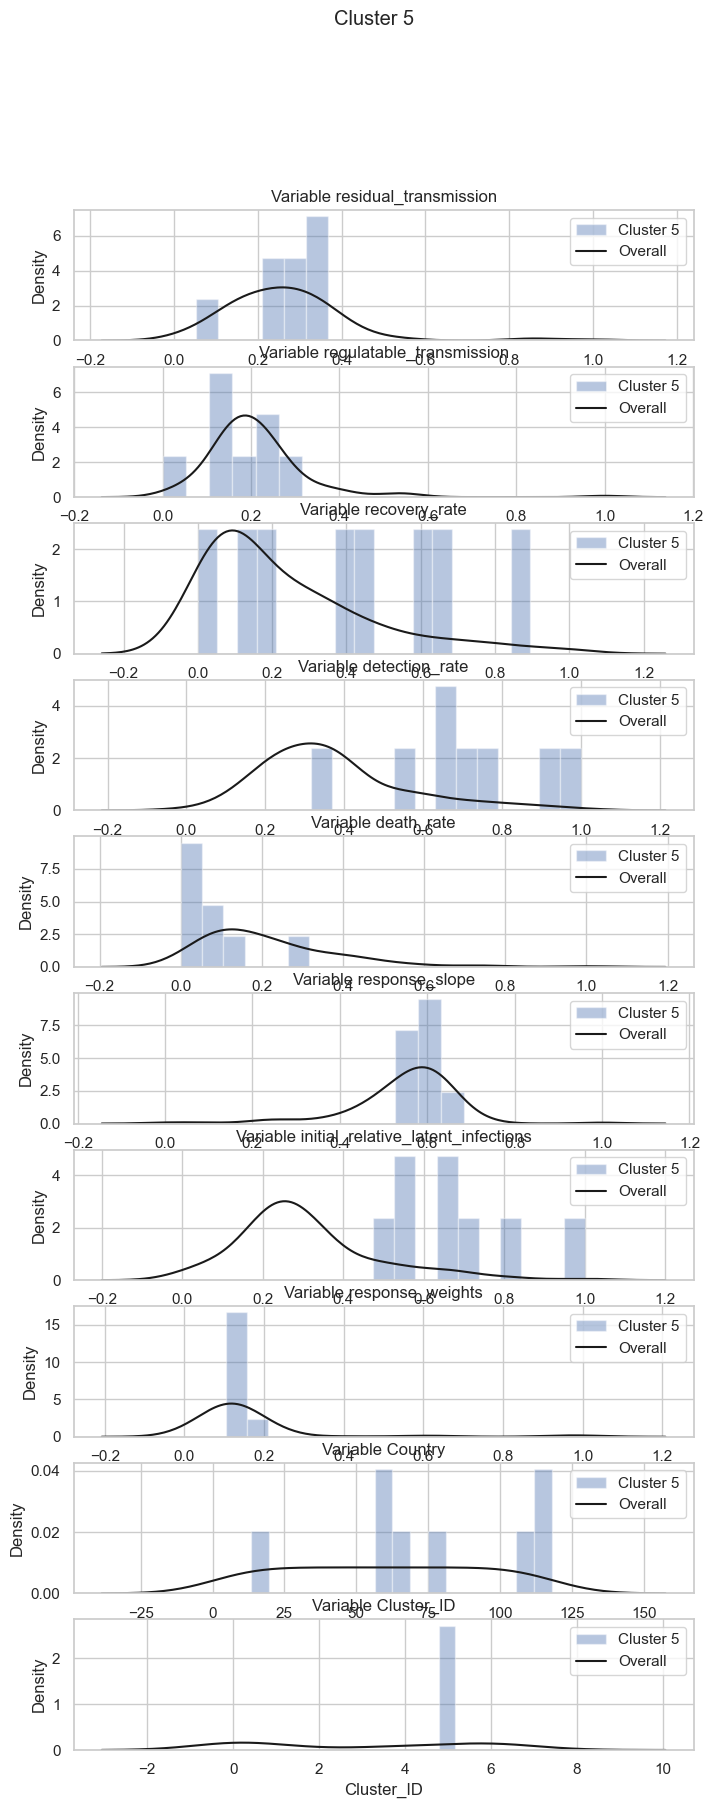

Distribution for cluster 6


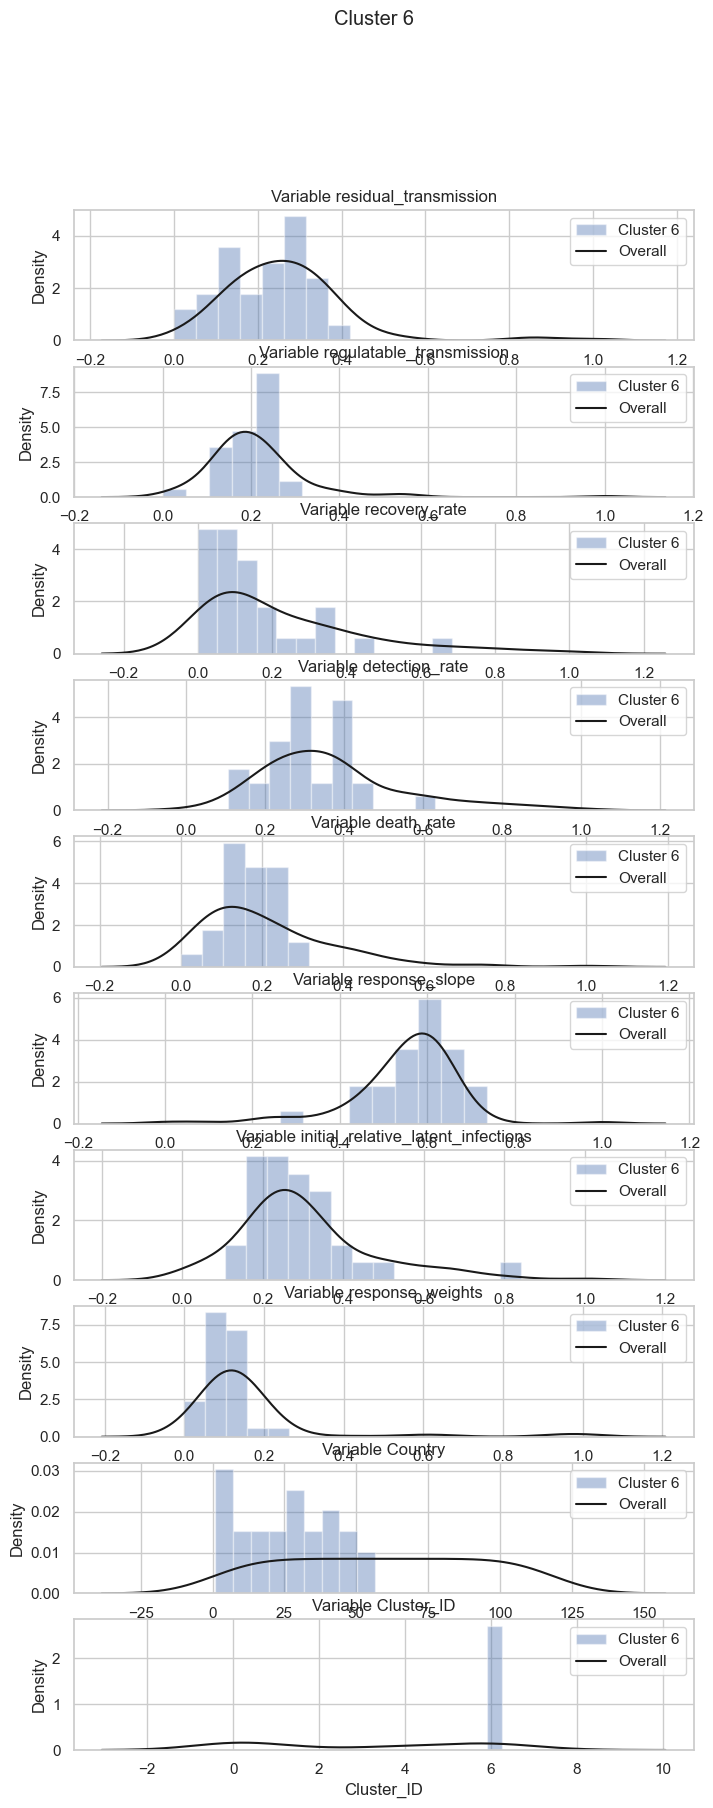

Distribution for cluster 7


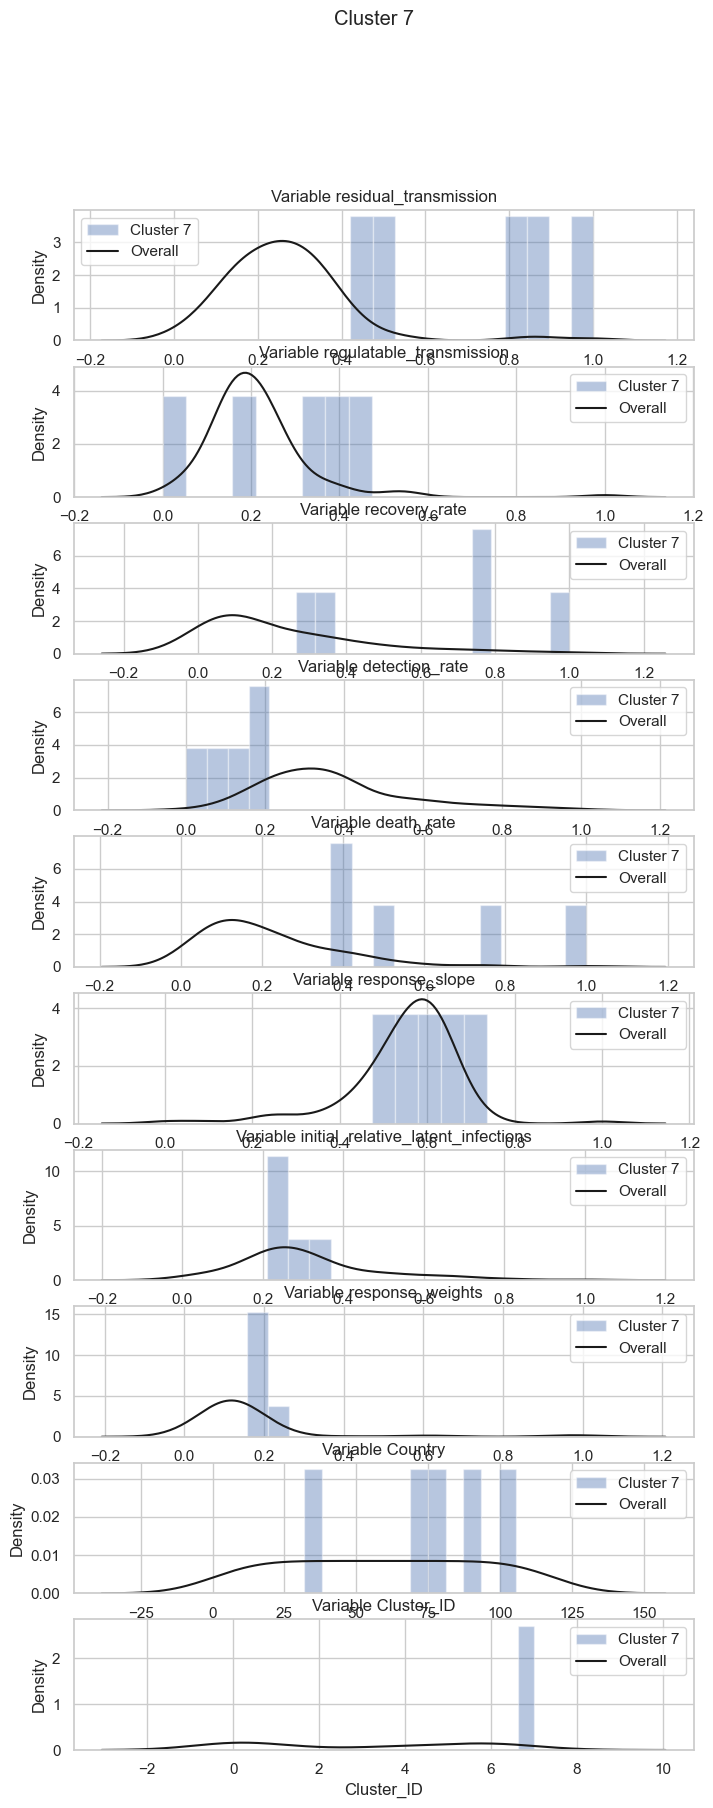

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# prepare the column and bin size. Increase bin size to be more specific, but 20 is more than enough
cols = D2_apr.columns.tolist()
n_bins = 20

clusters_to_inspect = [0, 1, 2, 3, 4, 5, 6, 7]

for cluster in clusters_to_inspect:
    print("Distribution for cluster {}".format(cluster))
    
    # create subplots
    fig, ax = plt.subplots(nrows=len(cols), figsize=(8, 2*len(cols)))
    fig.suptitle("Cluster {}".format(cluster))
    
    for j, col in enumerate(cols):
        # create the bins
        bins = np.linspace(min(D2_apr[col]), max(D2_apr[col]), n_bins)
        # plot distribution of the cluster using histogram
        sns.distplot(D2_apr[D2_apr['Cluster_ID'] == cluster][col], bins=bins, ax=ax[j], norm_hist=True, kde=False, label='Cluster {}'.format(cluster))
        # plot the normal distribution with a black line
        sns.distplot(D2_apr[col], bins=bins, ax=ax[j], hist=False, color="k", label='Overall')
        ax[j].legend()
        ax[j].set_title("Variable {}".format(col))
    
    plt.show()


In [141]:
D2_mar

residual_transmission  regulatable_transmission  recovery_rate  \
0                 0.082074                  0.165898       0.129952   
1                 0.562484                  0.455037       0.117553   
2                 0.155940                  0.114082       0.120652   
3                 0.223770                  0.057646       0.188609   
4                 0.125226                  0.175619       0.064618   
..                     ...                       ...            ...   
97                0.178046                  0.084134       0.151173   
98                0.184568                  0.114789       0.040774   
99                0.268043                  0.240094       0.066526   
100               0.198542                  0.211868       0.438595   
101               0.149247                  0.199806       0.041251   

     detection_rate  death_rate  response_slope  \
0          0.182487    0.171807        0.246873   
1          0.131436    1.000000        0.321751   
2          0.326850    0.045329        0.315136   
3          0.260266    0.175669        0.364244   
4          0.226420    0.359110        0.356035   
..              ...         ...             ...   
97         0.162166    0.163118        0.322492   
98         0.151685    0.282354        0.451490   
99         0.135846    0.135602        0.281618   
100        0.353946    0.126912        0.370205   
101        0.270077    0.078638        0.346278   

     initial_relative_latent_infections  response_weights  Country  Cluster_ID  
0                              0.390325          0.022931        6           6  
1                              0.363993          0.086713       47           0  
2                              0.328607          0.050099       48           9  
3                              0.148891          0.041622       49           9  
4                              0.198390          0.043566       50           5  
..                                  ...               ...      ...         ...  
97                             0.263635          0.049122        4           9  
98                             0.386296          0.068970       42           9  
99                             0.218832          0.061895       43           9  
100                            0.201136          0.050446        5           7  
101                            0.269970          0.037476       45           9  

[102 rows x 10 columns]

In [142]:
Country = ['Afghanistan', 'Albania', 'Andorra', 'United Arab Emirates', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Belgium',
                'Burkina Faso', 'Bangladesh', 'Bulgaria', 'Bahrain', 'Bosnia and Herzegovina', 'Bolivia', 'Brazil', 'Brunei', 'Canada', 'Switzerland',
                'Chile', 'China', 'Ivory Coast', 'Cameroon', 'Democratic Republic of the Congo', 'Colombia', 'Costa Rica', 'Cuba', 'Cyprus', 'Czech Republic',
                'Germany', 'Djibouti', 'Denmark', 'Dominican Republic', 'Algeria', 'Ecuador', 'Egypt', 'Spain', 'Estonia', 'Finland', 'France', 'United Kingdom',
                'Ghana', 'Guinea', 'Greece', 'Guatemala', 'Honduras', 'Croatia', 'Hungary', 'Indonesia', 'India', 'Ireland', 'Iran', 'Iraq', 'Iceland', 'Israel',
                'Italy', 'Jordan', 'Japan', 'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Cambodia', 'South Korea', 'Kuwait', 'Lebanon', 'Sri Lanka', 'Lithuania',
                'Luxembourg', 'Latvia', 'Morocco', 'Moldova', 'Madagascar', 'Mexico', 'North Macedonia', 'Mali', 'Malta', 'Montenegro', 'Mauritius', 'Malaysia',
                'Niger', 'Nigeria', 'Netherlands', 'Norway', 'New Zealand', 'Oman', 'Pakistan', 'Panama', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Paraguay',
                'Palestine', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saudi Arabia', 'Senegal', 'Singapore', 'El Salvador', 'Serbia', 'Slovakia', 'Slovenia',
                'Sweden', 'Thailand', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Taiwan', 'Ukraine', 'Uruguay', 'United States', 'Uzbekistan', 'Venezuela', 'Vietnam',
                'South Africa']

In [143]:
Abbreviation = ['AFG', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE', 'BEL', 'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BOL', 'BRA', 'BRN', 'CAN', 'CHE',
                     'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COL', 'CRI', 'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU', 'EGY', 'ESP', 'EST', 'FIN', 'FRA',
                     'GBR', 'GHA', 'GIN', 'GRC', 'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ', 'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ',
                     'KHM', 'KOR', 'KWT', 'LBN', 'LKA', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG', 'MEX', 'MKD', 'MLI', 'MLT', 'MNE', 'MUS', 'MYS', 'NER', 'NGA', 'NLD',
                     'NOR', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'POL', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU', 'SEN', 'SGP', 'SLV', 'SRB', 'SVK',
                     'SVN', 'SWE', 'THA', 'TTO', 'TUN', 'TUR', 'TWN', 'UKR', 'URY', 'USA', 'UZB', 'VEN', 'VNM', 'ZAF']
# Corresponding continents
continents = ['Asia',
'Europe',
'Europe',
'Asia',
'South America',
'Asia',
'Oceania',
'Europe',
'Asia',
'Europe',
'Africa',
'Asia',
'Europe',
'Asia',
'Europe',
'South America',
'South America',
'Asia',
'North America',
'Europe',
'South America',
'Asia',
'Africa',
'Africa',
'Africa',
'South America',
'Central America',
'Central America',
'Europe',
'Europe',
'Europe',
'Africa',
'Europe',
'Central America',
'Africa',
'South America',
'Africa',
'Europe',
'Europe',
'Europe',
'Europe',
'Europe',
'Africa',
'Africa',
'Europe',
'Central America',
'Central America',
'Europe',
'Europe',
'Asia',
'Asia',
'Europe',
'Asia',
'Asia',
'Europe',
'Asia',
'Europe',
'Asia',
'Asia',
'Asia',
'Africa',
'Asia',
'Asia',
'Asia',
'Asia',
'Asia',
'Asia',
'Europe',
'Europe',
'Europe',
'Africa',
'Europe',
'Africa',
'North America',
'Europe',
'Africa',
'Europe',
'Europe',
'Africa',
'Asia',
'Africa',
'Africa',
'Europe',
'Europe',
'Oceania',
'Asia',
'Asia',
'Central America',
'South America',
'Asia',
'Europe',
'Europe',
'South America',
'Asia',
'Asia',
'Europe',
'Europe',
'Africa',
'Asia',
'Africa',
'Asia',
'Central America',
'Europe',
'Europe',
'Europe',
'Europe',
'Asia',
'Central America',
'Africa',
'Europe/Asia (Transcontinental)',
'Asia',
'Europe',
'South America',
'North America',
'Asia',
'South America',
'Asia',
'Africa']


In [144]:
mapping

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117], dtype=int64)

In [145]:
labels

array(['AFG', 'ALB', 'AND', 'ARE', 'ARG', 'ARM', 'AUS', 'AUT', 'AZE',
       'BEL', 'BFA', 'BGD', 'BGR', 'BHR', 'BIH', 'BOL', 'BRA', 'BRN',
       'CAN', 'CHE', 'CHL', 'CHN', 'CIV', 'CMR', 'COD', 'COL', 'CRI',
       'CUB', 'CYP', 'CZE', 'DEU', 'DJI', 'DNK', 'DOM', 'DZA', 'ECU',
       'EGY', 'ESP', 'EST', 'FIN', 'FRA', 'GBR', 'GHA', 'GIN', 'GRC',
       'GTM', 'HND', 'HRV', 'HUN', 'IDN', 'IND', 'IRL', 'IRN', 'IRQ',
       'ISL', 'ISR', 'ITA', 'JOR', 'JPN', 'KAZ', 'KEN', 'KGZ', 'KHM',
       'KOR', 'KWT', 'LBN', 'LKA', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA',
       'MDG', 'MEX', 'MKD', 'MLI', 'MLT', 'MNE', 'MUS', 'MYS', 'NER',
       'NGA', 'NLD', 'NOR', 'NZL', 'OMN', 'PAK', 'PAN', 'PER', 'PHL',
       'POL', 'PRT', 'PRY', 'PSE', 'QAT', 'ROU', 'RUS', 'RWA', 'SAU',
       'SEN', 'SGP', 'SLV', 'SRB', 'SVK', 'SVN', 'SWE', 'THA', 'TTO',
       'TUN', 'TUR', 'TWN', 'UKR', 'URY', 'USA', 'UZB', 'VEN', 'VNM',
       'ZAF'], dtype=object)

In [146]:
len(Country)

118

In [147]:
len(continents)

118

In [148]:
# Create pandas Series from the lists
numbers_series = pd.Series(mapping, name='Country')
countries_series = pd.Series(Country, name='Name')
continents_series = pd.Series(continents, name='continents')

# Create DataFrames from the Series
database = pd.DataFrame(numbers_series, columns=['Country'])
country_continent_data = pd.DataFrame({'Country': numbers_series, 'Name': countries_series, 'continents': continents_series})

# Merge the two DataFrames based on the 'Number' column
merged_data = pd.merge(database, country_continent_data, on='Country')



In [149]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118 entries, 0 to 117
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Country     118 non-null    int64 
 1   Name        118 non-null    object
 2   continents  118 non-null    object
dtypes: int64(1), object(2)
memory usage: 3.7+ KB


In [152]:
D2_mar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102 entries, 0 to 101
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   residual_transmission               102 non-null    float64
 1   regulatable_transmission            102 non-null    float64
 2   recovery_rate                       102 non-null    float64
 3   detection_rate                      102 non-null    float64
 4   death_rate                          102 non-null    float64
 5   response_slope                      102 non-null    float64
 6   initial_relative_latent_infections  102 non-null    float64
 7   response_weights                    102 non-null    float64
 8   Country                             102 non-null    int64  
 9   Cluster_ID                          102 non-null    uint16 
dtypes: float64(8), int64(1), uint16(1)
memory usage: 7.5 KB


In [153]:
# Merge the dataframes based on 'Country' column
merged_df2 = pd.merge(D2_mar, merged_data[['Country', 'Name', 'continents']], on='Country', how='left')

# Rename the columns to match your requirement
merged_df2.rename(columns={'Name': 'Country Name', 'continents': 'Continent'}, inplace=True)

In [154]:
merged_df2

residual_transmission  regulatable_transmission  recovery_rate  \
0                 0.082074                  0.165898       0.129952   
1                 0.562484                  0.455037       0.117553   
2                 0.155940                  0.114082       0.120652   
3                 0.223770                  0.057646       0.188609   
4                 0.125226                  0.175619       0.064618   
..                     ...                       ...            ...   
97                0.178046                  0.084134       0.151173   
98                0.184568                  0.114789       0.040774   
99                0.268043                  0.240094       0.066526   
100               0.198542                  0.211868       0.438595   
101               0.149247                  0.199806       0.041251   

     detection_rate  death_rate  response_slope  \
0          0.182487    0.171807        0.246873   
1          0.131436    1.000000        0.321751   
2          0.326850    0.045329        0.315136   
3          0.260266    0.175669        0.364244   
4          0.226420    0.359110        0.356035   
..              ...         ...             ...   
97         0.162166    0.163118        0.322492   
98         0.151685    0.282354        0.451490   
99         0.135846    0.135602        0.281618   
100        0.353946    0.126912        0.370205   
101        0.270077    0.078638        0.346278   

     initial_relative_latent_infections  response_weights  Country  \
0                              0.390325          0.022931        6   
1                              0.363993          0.086713       47   
2                              0.328607          0.050099       48   
3                              0.148891          0.041622       49   
4                              0.198390          0.043566       50   
..                                  ...               ...      ...   
97                             0.263635          0.049122        4   
98                             0.386296          0.068970       42   
99                             0.218832          0.061895       43   
100                            0.201136          0.050446        5   
101                            0.269970          0.037476       45   

     Cluster_ID Country Name        Continent  
0             6    Australia          Oceania  
1             0      Croatia           Europe  
2             9      Hungary           Europe  
3             9    Indonesia             Asia  
4             5        India             Asia  
..          ...          ...              ...  
97            9    Argentina    South America  
98            9        Ghana           Africa  
99            9       Guinea           Africa  
100           7      Armenia             Asia  
101           9    Guatemala  Central America  

[102 rows x 12 columns]

In [159]:
# Set display options to show all rows and columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

df_sorted = merged_df2.sort_values(by='Cluster_ID')
df_sorted

residual_transmission  regulatable_transmission  recovery_rate  \
1                 0.562484                  0.455037       0.117553   
15                0.559716                  0.420529       0.187655   
29                0.686526                  0.528144       0.078686   
82                0.495470                  0.291944       0.088939   
52                1.000000                  0.727238       0.108015   
79                0.656538                  0.459916       0.074394   
44                0.627592                  0.497157       0.150219   
7                 0.278832                  0.163941       0.562225   
67                0.698755                  0.429615       1.000000   
32                0.635884                  0.406057       0.564119   
16                0.183274                  0.485777       0.183601   
61                0.101376                  0.129381       0.054842   
33                0.195446                  0.220067       0.017406   
42                0.168190                  0.143246       0.035290   
36                0.190730                  0.268371       0.373185   
38                0.063302                  0.205855       0.029329   
39                0.189955                  0.132694       0.025275   
40                0.116089                  0.127627       0.047450   
34                0.188760                  0.088183       0.010968   
63                0.075167                  0.180672       0.012637   
45                0.276281                  0.174379       0.039582   
60                0.268035                  0.222403       0.058657   
47                0.270294                  0.172739       0.242041   
48                0.311476                  0.120826       0.102054   
49                0.116756                  0.117610       0.085363   
51                0.089640                  0.019378       0.257669   
53                0.265036                  0.142077       0.068672   
54                0.079594                  0.058468       0.063187   
55                0.000000                  0.135506       0.010492   
43                0.209320                  0.085619       0.026467   
62                0.176008                  0.142266       0.074871   
58                0.107234                  0.223146       0.114453   
56                0.119173                  0.166574       0.002623   
69                0.129165                  0.351682       0.073202   
68                0.131860                  0.101720       0.176686   
17                0.042822                  0.112627       0.276651   
30                0.138625                  0.231666       0.184794   
20                0.023434                  0.198417       0.016214   
21                0.136731                  0.197506       0.028852   
18                0.068265                  0.162097       0.079402   
24                0.151868                  0.000000       0.061518   
64                0.277460                  0.100460       0.043635   
23                0.199751                  0.127719       0.064380   
4                 0.125226                  0.175619       0.064618   
59                0.170586                  0.147544       0.022414   
78                0.297535                  0.292999       0.159757   
22                0.060163                  0.161996       0.089178   
27                0.147290                  0.127397       0.042920   
26                0.106122                  0.215648       0.057942   
65                0.201202                  0.115877       0.285762   
37                0.120561                  0.126125       0.175971   
41                0.198109                  0.106395       0.090847   
12                0.155188                  0.243163       0.147358   
86                0.203338                  0.150615       0.233734   
91                0.041564                  0.132156       0.278413   
93                0.184122   